# Project - Machine Learning

**Problem Statement:**

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

Data Dictionary:

Age	Employee Age

Gender	Employee Gender Male/Female

Engineer	Employee who are Engineers Yes-1, No-0

MBA	Employee who are MBA Yes-1, No-0

Work Exp	Employee Working Experience

Salary	Employee Salary

Distance	Avg Distance travelled by Employees

license	Employees are license holder or not Yes-1, No-0

Transport	Mode of Transport-Public Transport and Private Transport


## Data Ingestion:

## 1.1) Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [186]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings("ignore")

from yellowbrick.model_selection import feature_importances

### Load the Data

In [188]:
df = pd.read_csv("Transport (1).csv")

### Check the data .shape, .head(), .tail(), .info()

In [189]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  444 
no. of columns:  9


In [190]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [191]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


### Check for missing value in any column

In [193]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

### Check for duplicate data

In [194]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


### Summary of the data

In [195]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Lets rename few columns and convert the columns with an 'object' datatype into categorical variables

In [196]:
# refining the column names
df.rename(columns = {'Work Exp':'Work_Exp'}, inplace = True) 
df.rename(columns = {'license':'License'}, inplace = True) 

#### Count of Default and No Default in the Target Column

In [197]:
df['Transport'].value_counts(normalize=True)

Public Transport     0.675676
Private Transport    0.324324
Name: Transport, dtype: float64

###  Unique Counts of the Variable in the dataset

In [198]:
# Doing below feature transformation is changing the numeric value while doing encoding with cat.code() 

# df.Engineer.replace(to_replace=0, value='Non-Engineer', inplace=True)
# df.Engineer.replace(to_replace=1, value='Engineer', inplace=True)

In [199]:
# df.MBA.replace(to_replace=0, value='Non-MBA', inplace=True)
# df.MBA.replace(to_replace=1, value='MBA', inplace=True)

In [200]:
# df.License.replace(to_replace=0, value='Unlicenced', inplace=True)
# df.License.replace(to_replace=1, value='Licenced', inplace=True)

In [201]:
for column in df:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGE :  25
43     1
19     1
42     1
18     2
35     2
37     4
20     5
36     6
40     7
39     7
21     8
38     9
34    11
33    11
32    13
22    15
31    16
23    24
29    26
30    34
25    37
24    46
28    46
27    49
26    63
Name: Age, dtype: int64


GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


ENGINEER :  2
0    109
1    335
Name: Engineer, dtype: int64


MBA :  2
1    112
0    332
Name: MBA, dtype: int64


WORK_EXP :  24
24     1
17     2
15     2
22     3
13     3
18     5
12     5
16     5
20     6
21     6
14     8
19    10
11    11
10    14
9     21
1     22
8     28
7     28
0     29
5     42
6     46
3     46
2     47
4     54
Name: Work_Exp, dtype: int64


SALARY :  122
50.0     1
16.5     1
24.9     1
6.7      1
14.3     1
        ..
14.9    11
12.8    12
13.6    12
8.5     13
14.6    22
Name: Salary, Length: 122, dtype: int64


DISTANCE :  137
23.4     1
18.0     1
19.8     1
22.8     1
20.7     1
        ..
9.4      7
11.7     8
9.0      9


## 1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

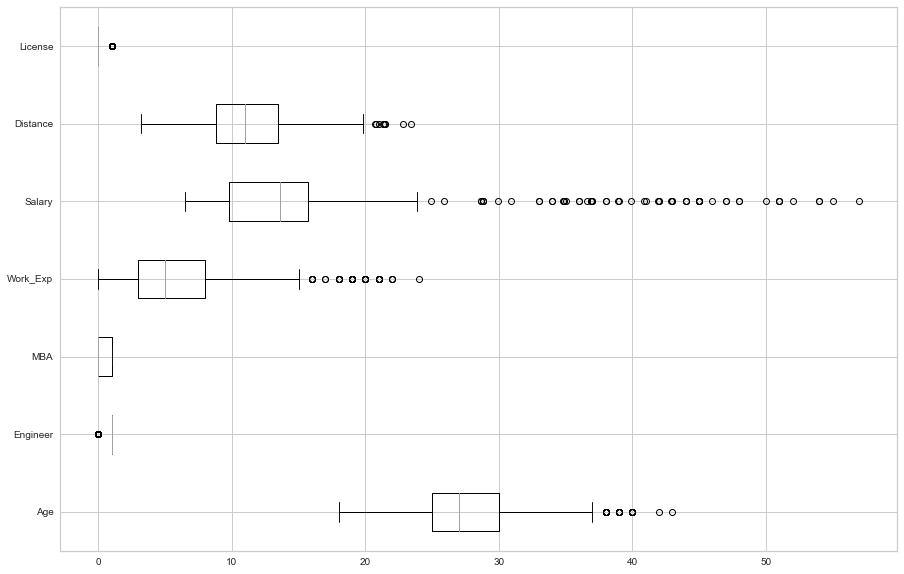

In [202]:
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.show()

** Salary, work_exp and Age column are showing outliers**

In [203]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,5.63
Distance,2.03
Engineer,24.55
Gender,0.00
License,23.42
MBA,0.00
Salary,13.29
Transport,0.00
Work_Exp,8.56


In [204]:
pd.DataFrame(data=[df.kurtosis(),df.skew()],index=['Kurtosis','Skewness']).T.round(2)

,Kurtosis,Skewness
Age,0.94,0.96
Engineer,-0.59,-1.19
MBA,-0.69,1.14
Work_Exp,1.48,1.35
Salary,3.48,2.04
Distance,0.19,0.54
License,-0.42,1.26


## Data Visualization

### Univariate Analysis

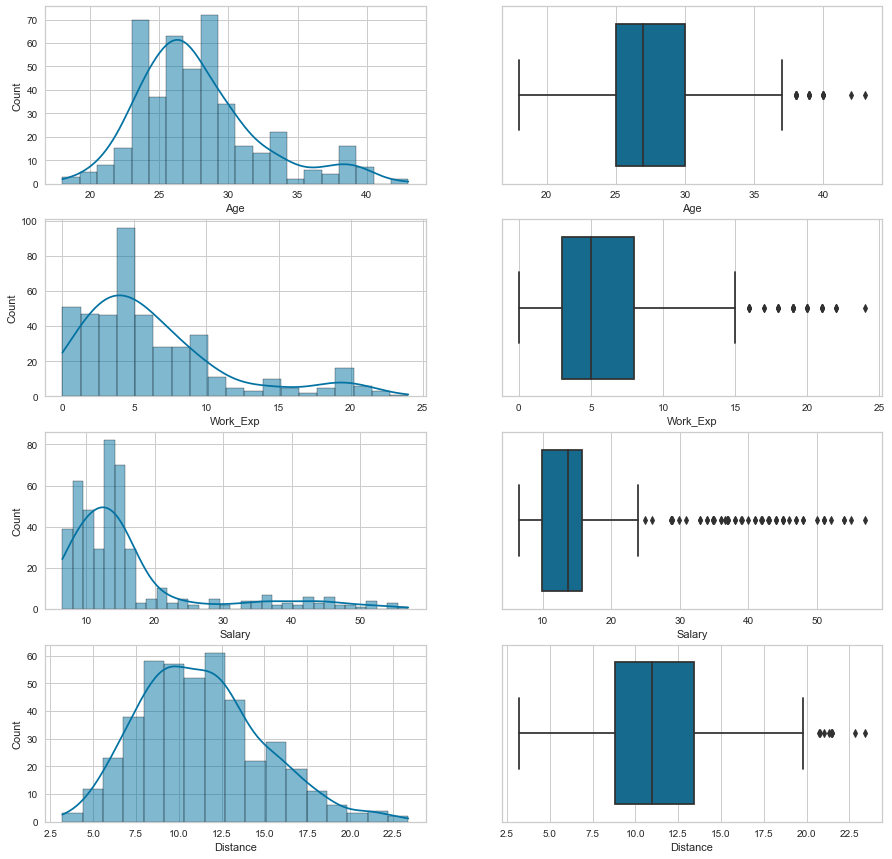

In [205]:
# Numerical Columns
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Work_Exp'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Work_Exp', data=df , ax=axes[1][1])
sns.histplot(df['Salary'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Salary', data=df , ax=axes[2][1])
sns.histplot(df['Distance'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Distance', data=df , ax=axes[3][1])
plt.show()


Categories present in Gender-


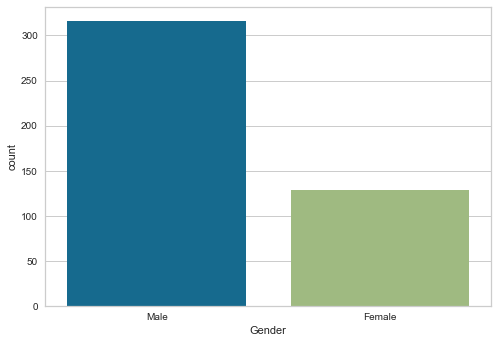

Categories present in Transport-


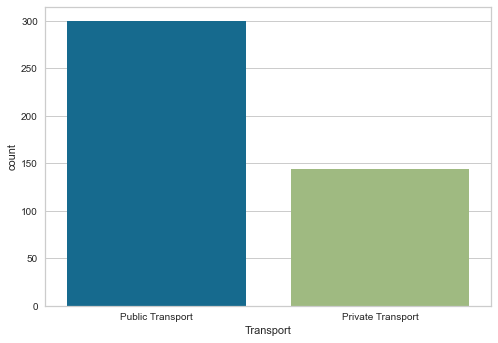

In [206]:
# Making countplots for Categorical variavles- 
for feature in df.columns: 
    if df[feature].dtype == 'object':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(df[feature])
        plt.show()

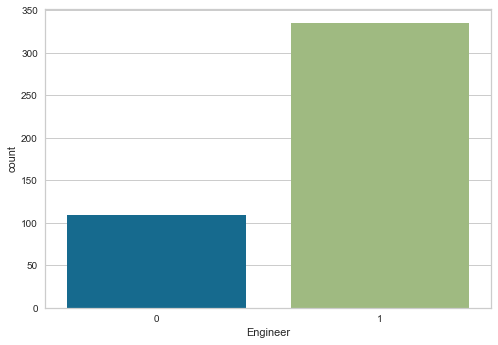

In [207]:
sns.countplot(df['Engineer']);

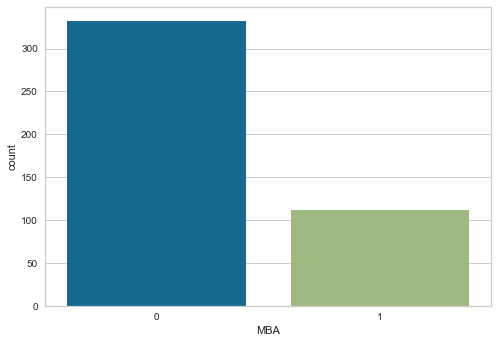

In [208]:
sns.countplot(df['MBA']);

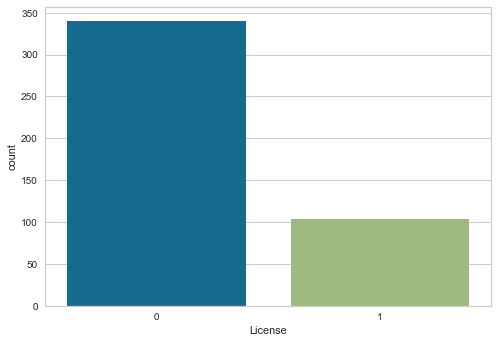

In [209]:
sns.countplot(df['License']);

### Bivariate Analysis

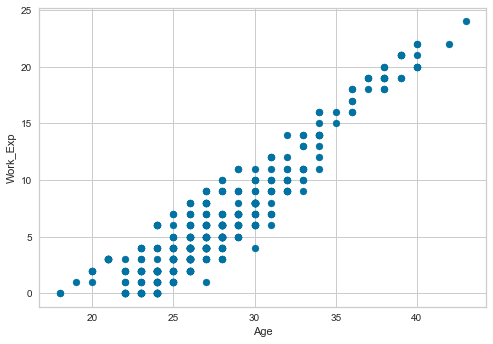

In [210]:
# numeric vs numeric
plt.scatter(df['Age'],df['Work_Exp']);
plt.xlabel('Age')
plt.ylabel('Work_Exp');

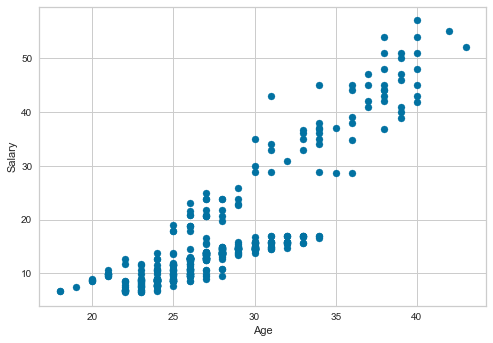

In [211]:
plt.scatter(df['Age'],df['Salary']);
plt.xlabel('Age')
plt.ylabel('Salary');

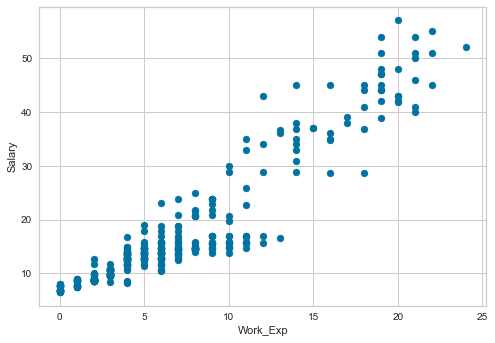

In [212]:
plt.scatter(df['Work_Exp'],df['Salary']);
plt.xlabel('Work_Exp')
plt.ylabel('Salary');

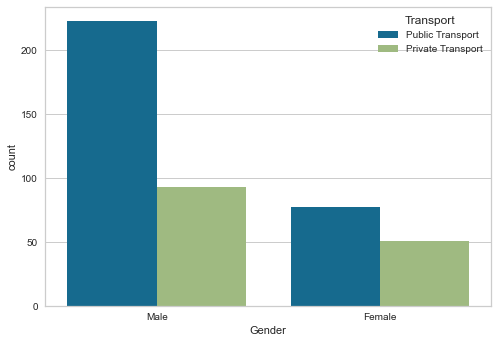

In [213]:
#Categorical vs categorical
sns.countplot(x='Gender', hue='Transport', data=df);

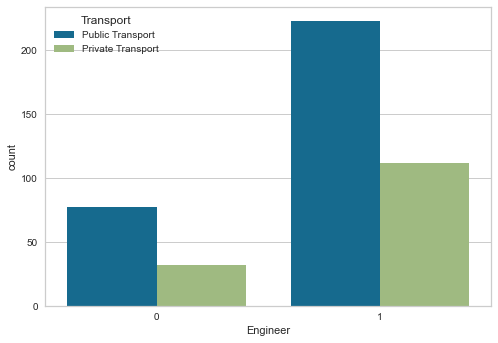

In [214]:
sns.countplot(x='Engineer', hue='Transport', data=df);

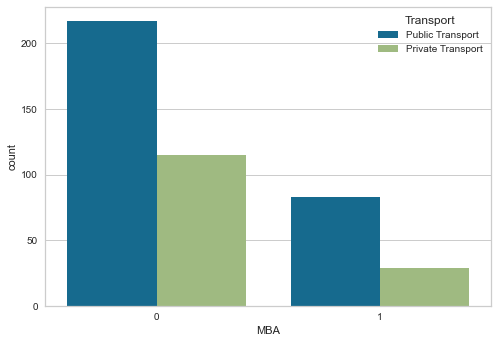

In [215]:
sns.countplot(x='MBA', hue='Transport', data=df);

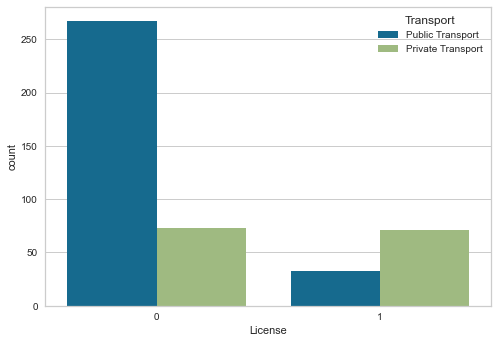

In [216]:
sns.countplot(x='License', hue='Transport', data=df);

In [217]:
pd.crosstab(df['Gender'], df['Transport'], margins=True, normalize = True)

Transport,Private Transport,Public Transport,All
Gender,,,
Female,0.114865,0.173423,0.288288
Male,0.209459,0.502252,0.711712
All,0.324324,0.675676,1.000000


**- We see from above that 50% od male are using Public Transport**

In [218]:
pd.crosstab(df['MBA'], df['Transport'], margins=True, normalize = True)

Transport,Private Transport,Public Transport,All
MBA,,,
0,0.259009,0.488739,0.747748
1,0.065315,0.186937,0.252252
All,0.324324,0.675676,1.000000


**- 48% of non-MBA employees are using Public Transport only**

In [219]:
pd.crosstab(df['Engineer'], df['Transport'], margins=True, normalize = True)

Transport,Private Transport,Public Transport,All
Engineer,,,
0,0.072072,0.173423,0.245495
1,0.252252,0.502252,0.754505
All,0.324324,0.675676,1.000000


**- likewise 50% of engineers are using Public Transport**

In [220]:
pd.crosstab(df['License'], df['Transport'], margins=True, normalize = True)

Transport,Private Transport,Public Transport,All
License,,,
0,0.164414,0.601351,0.765766
1,0.159910,0.074324,0.234234
All,0.324324,0.675676,1.000000


**- obvious reason 74% of non licenced holders are using public transport**

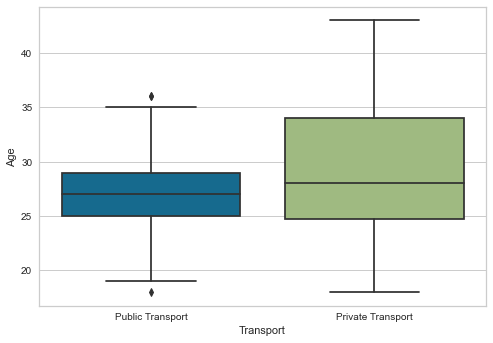

In [221]:
## Categorical vs Numeric
fig_dims = (12, 5)
sns.boxplot(x='Transport', y='Age', data=df);

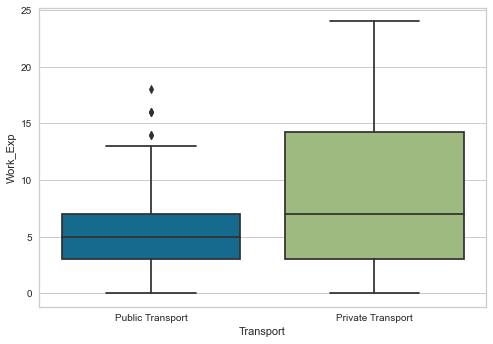

In [222]:
fig_dims = (12, 5)
sns.boxplot(x='Transport', y='Work_Exp', data=df);

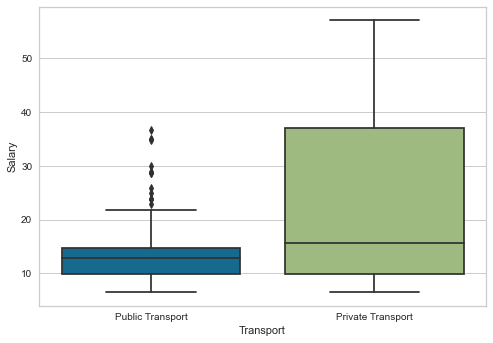

In [223]:
fig_dims = (12, 5)
sns.boxplot(x='Transport', y='Salary', data=df);

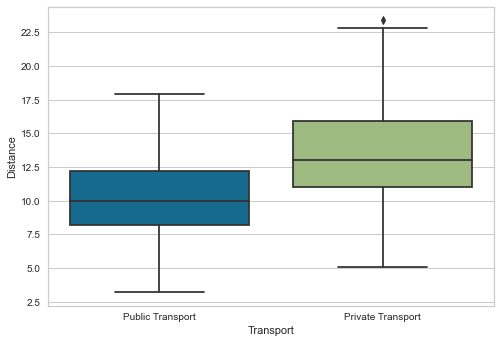

In [224]:
fig_dims = (12, 5)
sns.boxplot(x='Transport', y='Distance', data=df);

Insights:
- Median value of the expected distance for employees who have Public Transport is not same as employee who have Private Transport. 
- However, there is a major difference in the range of expected distance for the 2 categories.

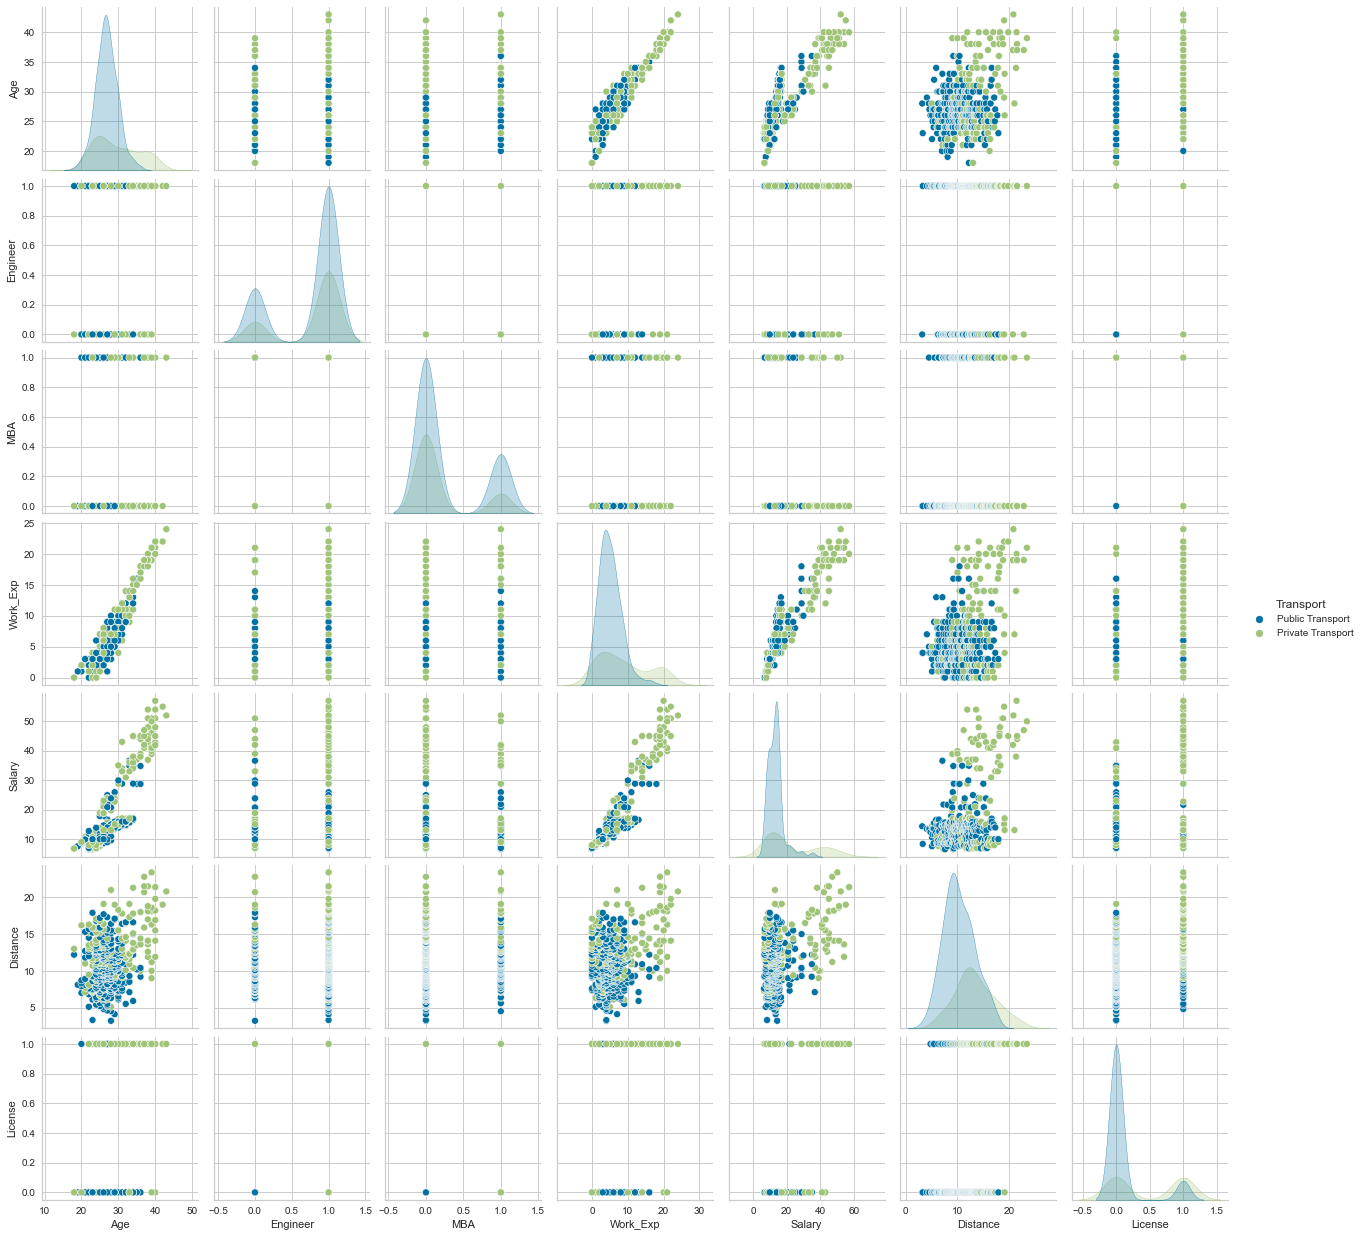

In [225]:
sns.pairplot(df, hue="Transport");

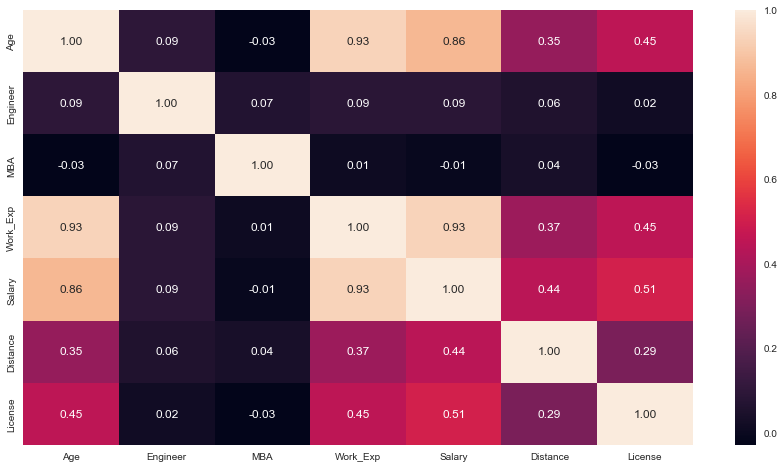

In [226]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

## Multivariate Analysis

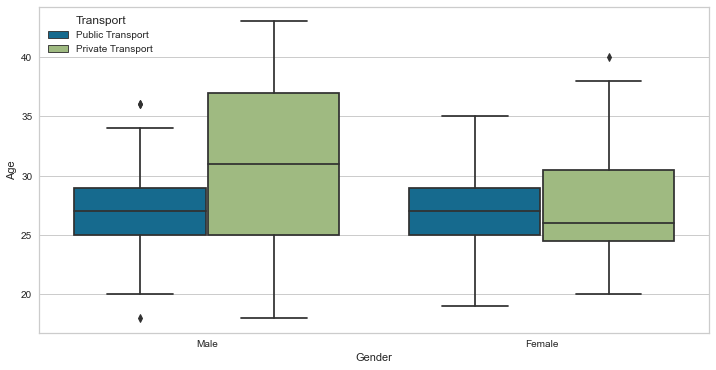

In [227]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Gender', y='Age', hue='Transport',data=df);

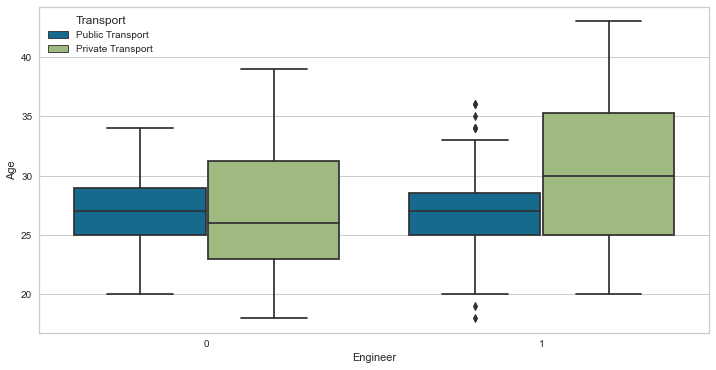

In [228]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Engineer', y='Age', hue='Transport',data=df);

Insights:
- Median age of Engineer who have Private Transport is higher than Engineers who uses public transport.

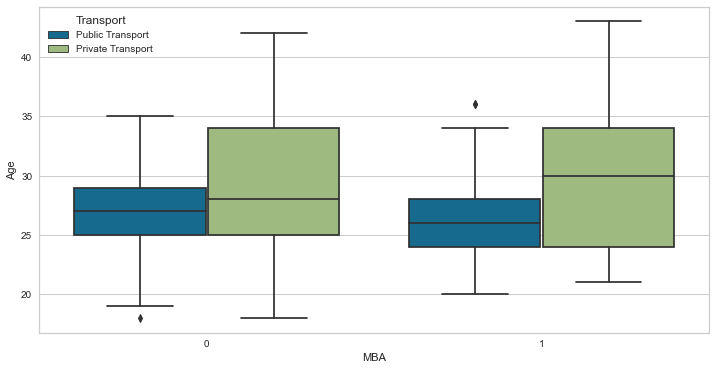

In [229]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='MBA', y='Age', hue='Transport',data=df);

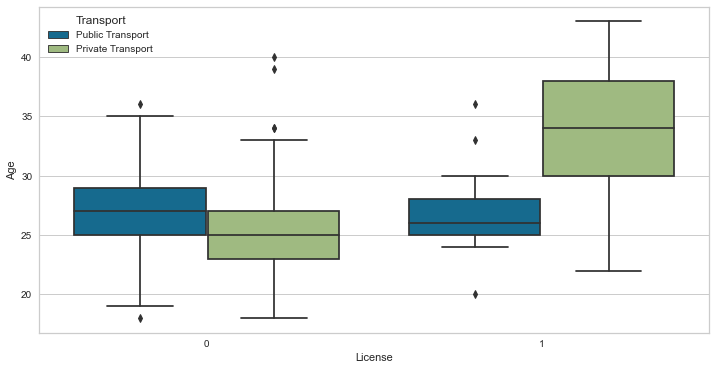

In [230]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='License', y='Age', hue='Transport',data=df);

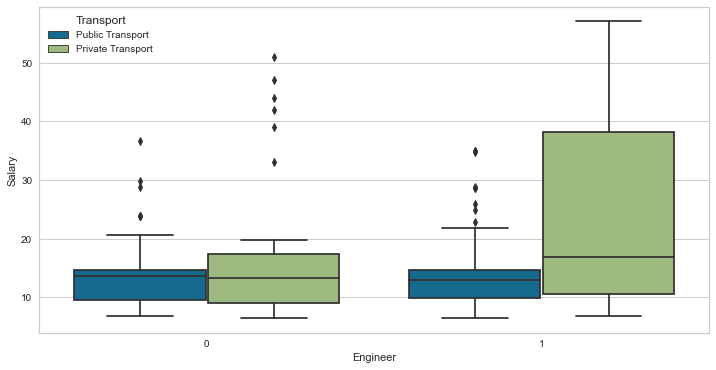

In [231]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Engineer', y='Salary', hue='Transport',data=df);

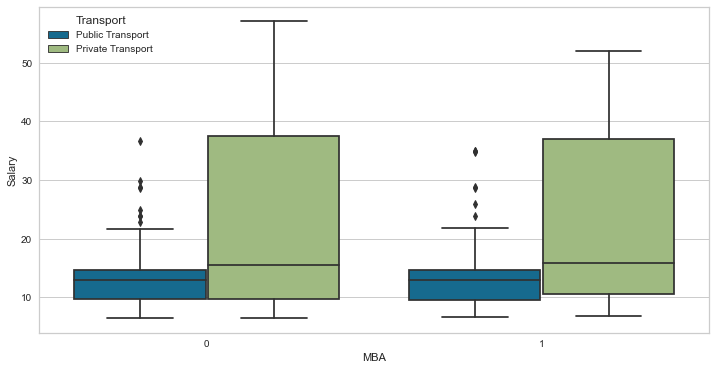

In [232]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='MBA', y='Salary', hue='Transport',data=df);

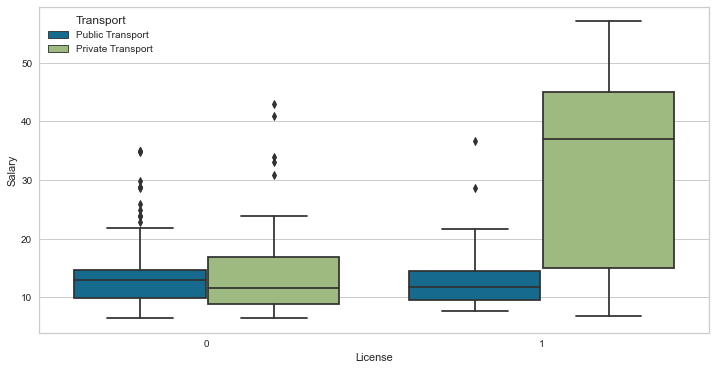

In [233]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='License', y='Salary', hue='Transport',data=df);

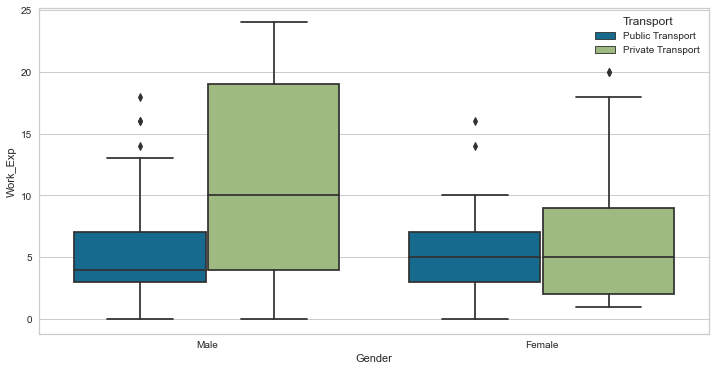

In [234]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Gender', y='Work_Exp', hue='Transport',data=df);

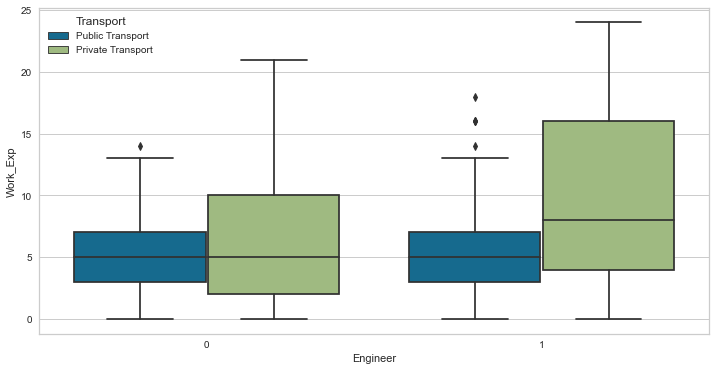

In [235]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Engineer', y='Work_Exp', hue='Transport',data=df);

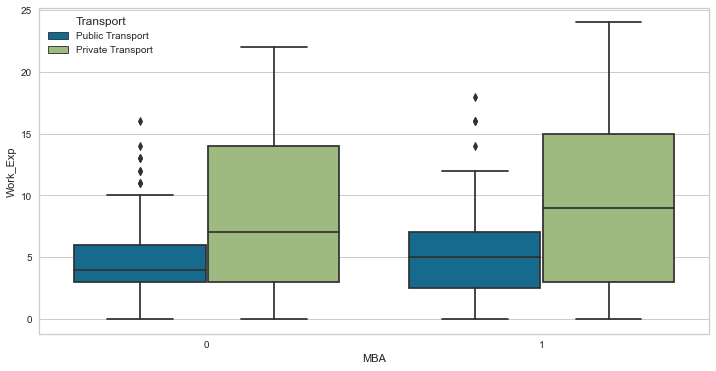

In [236]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='MBA', y='Work_Exp', hue='Transport',data=df);

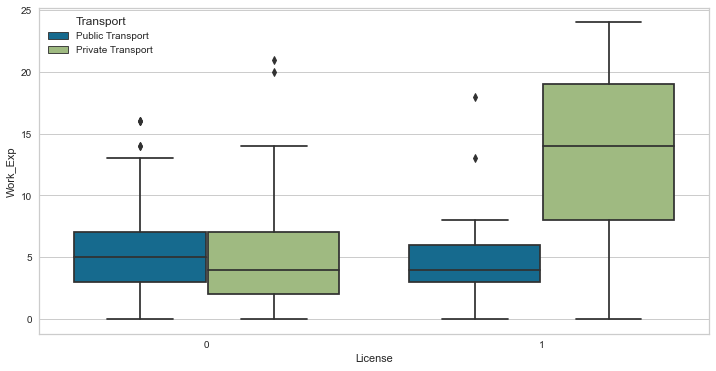

In [237]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='License', y='Work_Exp', hue='Transport',data=df);

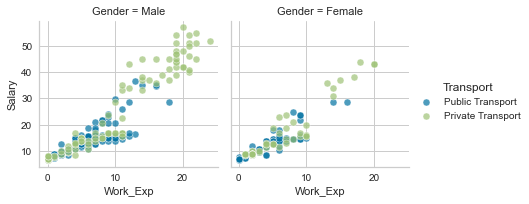

In [238]:
g = sns.FacetGrid(df, col="Gender", hue="Transport")
g.map(sns.scatterplot, "Work_Exp", "Salary", alpha=.7)
g.add_legend();

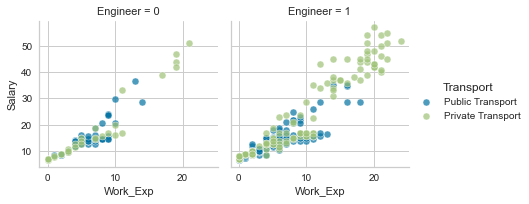

In [239]:
g = sns.FacetGrid(df, col="Engineer", hue="Transport")
g.map(sns.scatterplot, "Work_Exp", "Salary", alpha=.7)
g.add_legend();

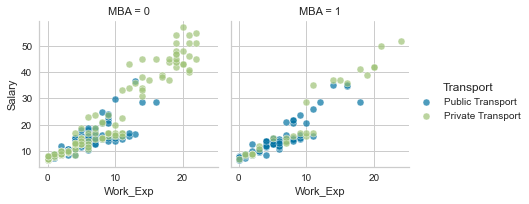

In [240]:
g = sns.FacetGrid(df, col="MBA", hue="Transport")
g.map(sns.scatterplot, "Work_Exp", "Salary", alpha=.7)
g.add_legend();

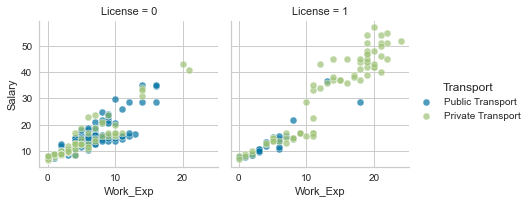

In [241]:
g = sns.FacetGrid(df, col="License", hue="Transport")
g.map(sns.scatterplot, "Work_Exp", "Salary", alpha=.7)
g.add_legend();

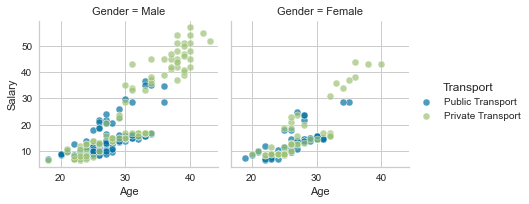

In [242]:
g = sns.FacetGrid(df, col="Gender", hue="Transport")
g.map(sns.scatterplot, "Age", "Salary", alpha=.7)
g.add_legend();

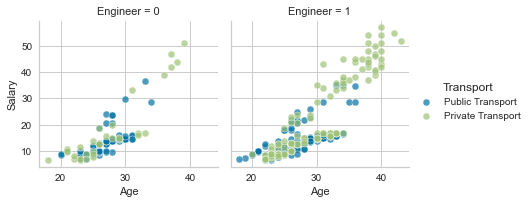

In [243]:
g = sns.FacetGrid(df, col="Engineer", hue="Transport")
g.map(sns.scatterplot, "Age", "Salary", alpha=.7)
g.add_legend();

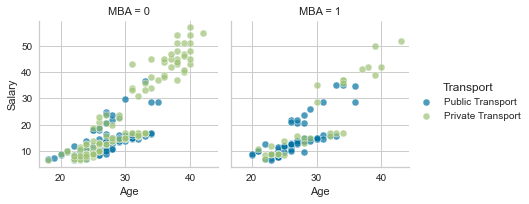

In [244]:
g = sns.FacetGrid(df, col="MBA", hue="Transport")
g.map(sns.scatterplot, "Age", "Salary", alpha=.7)
g.add_legend();

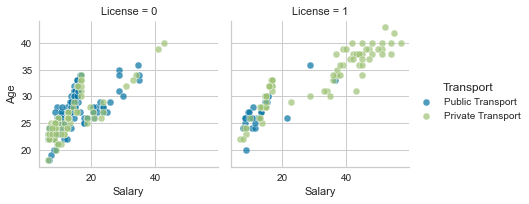

In [245]:
g = sns.FacetGrid(df, col="License", hue="Transport")
g.map(sns.scatterplot, "Salary", "Age", alpha=.7)
g.add_legend();

# Data Preparation: 
## 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   License    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [247]:
# cat = []

# num = []

# for i in df.columns:
#     if df[i].dtype == 'object':
#         cat.append(i)
#     else:
#         num.append(i)


# print(cat)
# print(num)

In [248]:
# df = pd.get_dummies(df , columns = ['Gender', 'Engineer', 'MBA', 'License'], drop_first=True)

In [249]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']
[1 0]


In [250]:
df.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,License,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1


In [251]:
df.describe()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,License,Transport
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.711712,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234,0.675676
std,4.416710,0.453477,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997,0.468650
min,18.000000,0.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000,0.000000
25%,25.000000,0.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000,0.000000
50%,27.000000,1.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000,1.000000
75%,30.000000,1.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000,1.000000
max,43.000000,1.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000,1.000000


In [252]:
df.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

##### There is no issue of class imbalance here as we have reasonable proportions in both the classes

### Extract the target column into separate vectors for training set and test set

In [253]:
X = df.drop("Transport", axis=1)

y = df.pop("Transport")

X.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,License
0,28,1,0,0,4,14.3,3.2,0
1,23,0,1,0,4,8.3,3.3,0
2,29,1,1,0,7,13.4,4.1,0
3,28,0,1,1,5,13.4,4.5,0
4,27,1,1,0,4,13.4,4.6,0


### Split data into training and test set

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Check the dimensions of the training and test data

In [255]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (310, 8)
X_test (134, 8)
y_train (310,)
y_test (134,)


In [256]:
y_train.value_counts()

1    208
0    102
Name: Transport, dtype: int64

In [257]:
y_test.value_counts()

1    92
0    42
Name: Transport, dtype: int64

## Scaling

#### We need to do scaling before using distance based models. Here we are using Min-Max scaling.

In [258]:
# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler

# X_train_norm=X_train.copy()
# X_test_norm=X_test.copy()

# num_cols = ['Age','Salary','Distance','Work_Exp']

# for i in num_cols:
    
#     # fit scaler on training data
#     norm = MinMaxScaler().fit(X_train_norm[[i]])

#     # transform training data
#     X_train_norm[i] = norm.transform(X_train_norm[[i]])

#     # transform testing dataabs
#     X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [259]:
# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler

# X_train_sc=X_train.copy()
# X_test_sc=X_test.copy()


# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train_sc)

# # transform training data
# X_train_sc = norm.transform(X_train_sc)

# # transform testing dataabs
# X_test_sc = norm.transform(X_test_sc)


In [260]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()

# numerical features
num_cols = ['Age','Salary','Distance','Work_Exp']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    sc = StandardScaler().fit(X_train_sc[[i]])
    
    # transform the training data column
    X_train_sc[i] = sc.fit_transform(X_train_sc[[i]])
    
    # transform the testing data column
    X_test_sc[i] = sc.transform(X_test_sc[[i]])

In [261]:
X_test_sc.describe()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,License
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.034080,0.746269,0.776119,0.231343,0.039882,0.011810,0.027754,0.268657
std,1.065827,0.436778,0.418407,0.423274,1.036834,1.012023,0.954179,0.444924
min,-2.241597,0.000000,0.000000,0.000000,-1.234252,-0.902617,-1.830917,0.000000
25%,-0.624488,0.250000,1.000000,0.000000,-0.640739,-0.604997,-0.716103,0.000000
50%,-0.162456,1.000000,1.000000,0.000000,-0.245063,-0.240171,0.015708,0.000000
75%,0.530591,1.000000,1.000000,0.000000,0.348450,-0.057759,0.508142,1.000000
max,3.302779,1.000000,1.000000,1.000000,3.118177,3.916917,2.792486,1.000000


In [262]:
X_train_sc.describe()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,License
count,3.100000e+02,310.000000,310.000000,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,310.000000
mean,2.435328e-17,0.696774,0.745161,0.261290,8.487834e-17,-1.031433e-16,3.767596e-16,0.219355
std,1.001617e+00,0.460395,0.436475,0.440048,1.001617e+00,1.001617e+00,1.001617e+00,0.414479
min,-2.241597e+00,0.000000,0.000000,0.000000,-1.234252e+00,-9.314194e-01,-2.213921e+00,0.000000
25%,-6.244876e-01,0.000000,0.000000,0.000000,-6.407389e-01,-6.145974e-01,-6.819057e-01,0.000000
50%,-1.624562e-01,1.000000,1.000000,0.000000,-2.450635e-01,-2.497722e-01,-1.073999e-01,0.000000
75%,5.305909e-01,1.000000,1.000000,1.000000,3.484496e-01,-4.095768e-02,6.244110e-01,0.000000
max,3.533795e+00,1.000000,1.000000,1.000000,3.513853e+00,3.628897e+00,3.312277e+00,1.000000


# Modelling

## 1.4) Apply Logistic Regression. Interpret the results

**Logistic regression is a linear model for classification rather than regression. It is also known as logit regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.**

**Note: Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability.**

In [263]:
model1 = LogisticRegression(random_state=1)
model1.fit(X_train_sc, y_train)  

LogisticRegression(random_state=1)

In [264]:
y_train_predict = model1.predict(X_train_sc)
y_test_predict = model1.predict(X_test_sc)

In [265]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model1.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model1.predict_proba(X_test_sc)[:,1])))

print('\n\n')
print('Logistic Regression Classification report Train set :')
print(classification_report(y_train,model1.predict(X_train_sc)))

print('\n')

print('Logistice Regression Classification report Test set :')
print(classification_report(y_test,model1.predict(X_test_sc)))

Train Accuracy is : 0.7967741935483871

Test Accuracy is : 0.8208955223880597

Train ROC-AUC score is : 0.8319193061840121

Test ROC-AUC score is : 0.818840579710145



Logistic Regression Classification report Train set :
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       102
           1       0.80      0.93      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.73      0.75       310
weighted avg       0.79      0.80      0.78       310



Logistice Regression Classification report Test set :
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        42
           1       0.83      0.92      0.88        92

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134



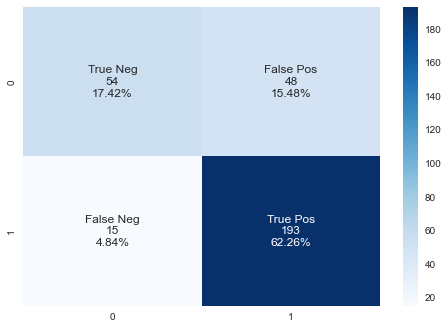

In [266]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model1.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model1.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model1.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model1.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

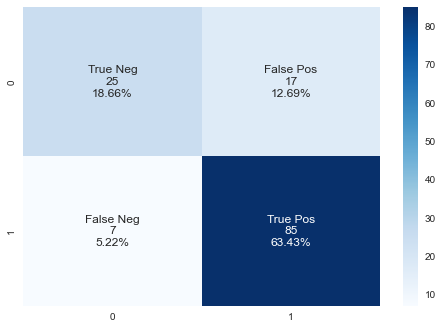

In [267]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model1.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model1.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model1.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Logistic Regression Classifier Train: ROC AUC=0.832
Logistic Regression classifier test: ROC AUC=0.819


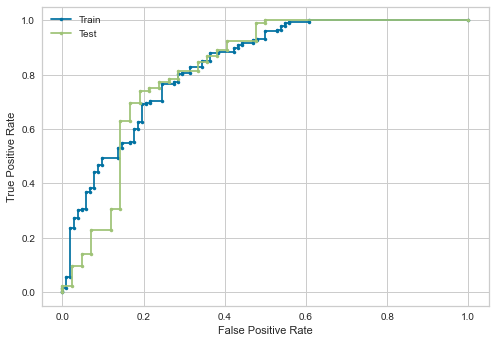

In [268]:
#train
lr_probs =model1.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic Regression Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = model1.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic Regression classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [269]:
Model_Logistic_Regression=pd.DataFrame({'Training Data':[accuracy_score(y_train,model1.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model1.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model1.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model1.predict_proba(X_test_sc)[:,1])]},index=['Logistic Regression Model'])
Model_Logistic_Regression

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Logistic Regression Model,0.796774,0.820896,0.831919,0.818841


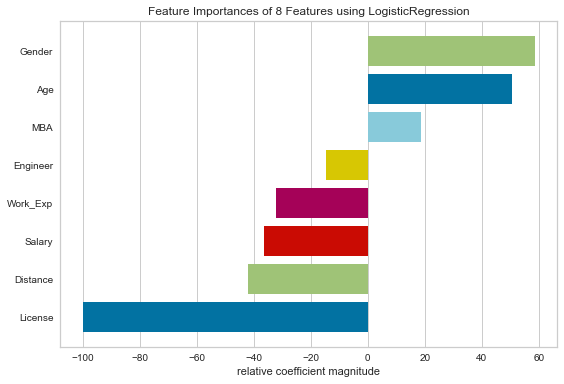

In [270]:
# Feature Importance

from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model1)
viz.fit(X_train_sc, y_train)
viz.show();

this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [271]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# model = LinearRegression()
# # fit the model
# model.fit(X_train_sc, y_train)
# get importance
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

Feature: 0, Score: 0.93857
Feature: 1, Score: 1.08562
Feature: 2, Score: -0.27267
Feature: 3, Score: 0.34690
Feature: 4, Score: -0.59732
Feature: 5, Score: -0.67838
Feature: 6, Score: -0.78262
Feature: 7, Score: -1.85525


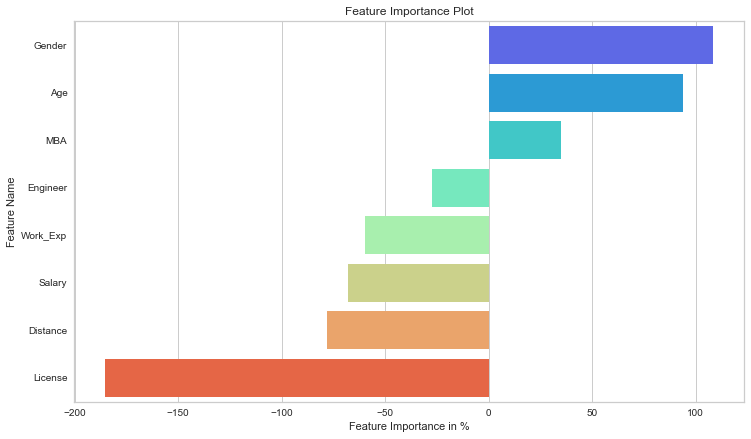

In [272]:
x=pd.DataFrame(importance*100, index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show();

### Hyper Tunning of Logistic Regression Classification

In [273]:
params_lr = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['l2'],'C':[100, 10, 1.0, 0.1, 0.01]}

In [274]:
model2 = GridSearchCV(LogisticRegression(),param_grid=params_lr,n_jobs=-1,refit = True , scoring = 'accuracy' , cv = 5, verbose = 1)
model2.fit(X_train_sc,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [275]:
model2.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [276]:
from sklearn.metrics import accuracy_score

print("Train and Test Accuracy, ROC-AUC curve scores after Hyper Tunning\n")

print("Train Accuracy is : {}".format(accuracy_score(y_train,model2.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model2.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model2.predict_proba(X_train_sc)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model2.predict_proba(X_test_sc)[:,1])))

print('\n\n')
print('Logistic Regression-Tuned Classification report Train set :')
print(classification_report(y_train,model2.predict(X_train_sc)))

print('\n')

print('Logistice Regression-Tuned Classification report Test set :')
print(classification_report(y_test,model2.predict(X_test_sc)))

Train and Test Accuracy, ROC-AUC curve scores after Hyper Tunning

Train Accuracy is : 0.8129032258064516

Test Accuracy is : 0.7985074626865671

Train ROC-AUC score is : 0.8023190045248869

Test ROC-AUC score is : 0.8253105590062112



Logistic Regression-Tuned Classification report Train set :
              precision    recall  f1-score   support

           0       0.92      0.47      0.62       102
           1       0.79      0.98      0.88       208

    accuracy                           0.81       310
   macro avg       0.86      0.73      0.75       310
weighted avg       0.83      0.81      0.79       310



Logistice Regression-Tuned Classification report Test set :
              precision    recall  f1-score   support

           0       0.86      0.43      0.57        42
           1       0.79      0.97      0.87        92

    accuracy                           0.80       134
   macro avg       0.82      0.70      0.72       134
weighted avg       0.81      0.80      0.7

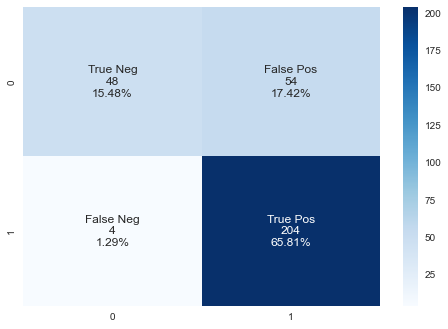

In [277]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model2.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model2.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model2.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model2.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

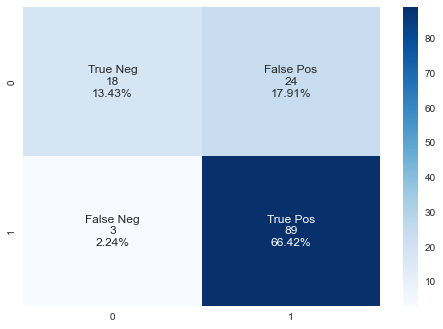

In [278]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model2.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model2.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model2.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model2.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Logistic Regression-Tuned Classifier Train: ROC AUC=0.802
Logistic Regression-Tuned classifier test: ROC AUC=0.825


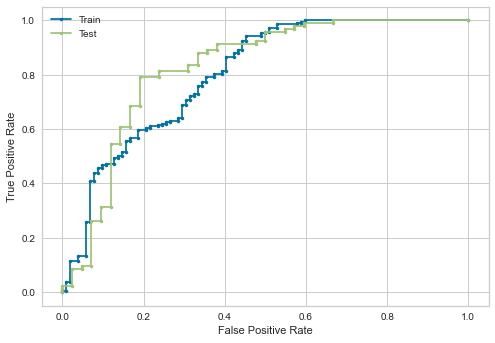

In [279]:
#train
lr_probs =model2.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic Regression-Tuned Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = model2.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic Regression-Tuned classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [280]:
Model_lr_tuned=pd.DataFrame({'Training Data':[accuracy_score(y_train,model2.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model2.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model2.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model2.predict_proba(X_test_sc)[:,1])]},index=['Logistic Regression Model-Tuned'])
Model_lr_tuned

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Logistic Regression Model-Tuned,0.812903,0.798507,0.802319,0.825311


--------------------------------------------------------------------------------------------------------------------------------

## 1.5) Apply KNN Model. Interpret the results

In [281]:
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [282]:
y_train_predict = model3.predict(X_train_sc)
y_test_predict = model3.predict(X_test_sc)

In [283]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model3.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model3.predict_proba(X_test_sc)[:,1])))

print('\n\n')
print('Classification report Train set :')
print(classification_report(y_train,y_train_predict))

print('Classification report Test set :')
print(classification_report(y_test,y_test_predict))

Train Accuracy is : 0.8387096774193549

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 0.9235011312217195

Test ROC-AUC score is : 0.7417184265010353



Classification report Train set :
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       102
           1       0.84      0.94      0.89       208

    accuracy                           0.84       310
   macro avg       0.84      0.78      0.80       310
weighted avg       0.84      0.84      0.83       310

Classification report Test set :
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        42
           1       0.80      0.91      0.85        92

    accuracy                           0.78       134
   macro avg       0.76      0.71      0.72       134
weighted avg       0.78      0.78      0.77       134



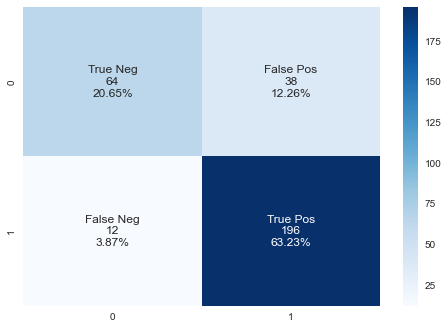

In [284]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model3.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model3.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model3.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model3.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

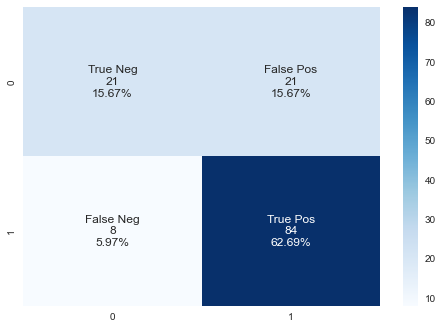

In [285]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model3.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model3.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model3.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model3.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Knn Model Train: ROC AUC=0.924
Knn Model test: ROC AUC=0.742


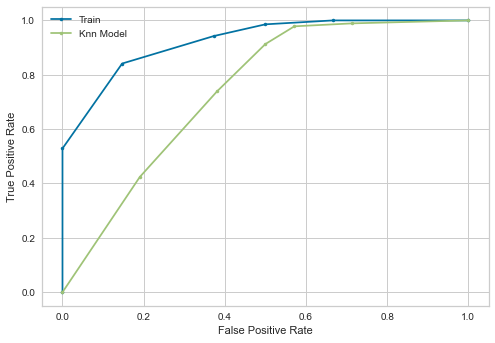

In [286]:
#train
Knn_probs =model3.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
Knn_probs = Knn_probs[:, 1]
# calculate scores
Knn_auc = roc_auc_score(y_train, Knn_probs)
# summarize scores
print('Knn Model Train: ROC AUC=%.3f' % (Knn_auc))

# calculate roc curves
Knn_fpr, Knn_tpr, _ = roc_curve(y_train, Knn_probs)
# plot the roc curve for the model
plt.plot(Knn_fpr, Knn_tpr, marker='.', label='Train')

#test
Knn_probs = model3.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
Knn_probs = Knn_probs[:, 1]
# calculate scores
Knn_auc = roc_auc_score(y_test, Knn_probs)
# summarize scores
print('Knn Model test: ROC AUC=%.3f' % (Knn_auc))

# calculate roc curves
Knn_fpr, Knn_tpr, _ = roc_curve(y_test, Knn_probs)
# plot the roc curve for the model
plt.plot(Knn_fpr, Knn_tpr, marker='.', label='Knn Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [287]:
Model_Knn=pd.DataFrame({'Training Data':[accuracy_score(y_train,model3.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model3.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model3.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model3.predict_proba(X_test_sc)[:,1])]},index=['KNN'])
Model_Knn

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
KNN,0.83871,0.783582,0.923501,0.741718


Feature: 0, Score: 0.02774
Feature: 1, Score: 0.02710
Feature: 2, Score: 0.00645
Feature: 3, Score: -0.00516
Feature: 4, Score: 0.02387
Feature: 5, Score: 0.02968
Feature: 6, Score: 0.06323
Feature: 7, Score: 0.02452


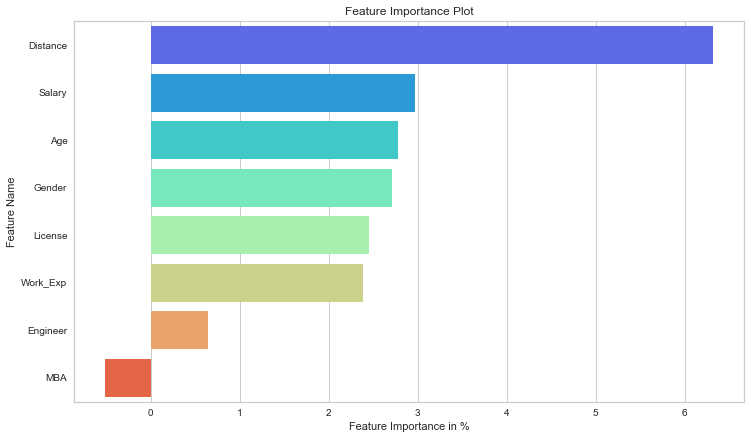

In [288]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
results = permutation_importance(model3, X_train_sc, y_train, scoring='accuracy')
# get importance
importance_Knn = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance_Knn):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

x=pd.DataFrame(importance_Knn*100, index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show();

### Hyper parameter tuning of KNN Classifier-

In [289]:
# params = {'n_neighbors':[13,15,17,19],'weights': ['uniform', 'distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size' : [15,30,45]}

params = {'n_neighbors':range(1,50),'weights': ['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size' : [15,30,45]}

In [290]:
model4 = GridSearchCV(KNeighborsClassifier() , param_grid=params , refit = True , scoring = 'accuracy' , cv = 3, verbose = 1)
model4.fit(X_train_sc,y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 45], 'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [291]:
model4.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'distance'}

In [292]:
from sklearn.metrics import accuracy_score

print("Train and Test Accuracy, AUC-ROC scores after Hyper Tunning\n")

print("Train Accuracy is : {}".format(accuracy_score(y_train,model4.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model4.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model4.predict_proba(X_train_sc)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model4.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('Classification report Train set :')
print(classification_report(y_train,model4.predict(X_train_sc)))

print('Classification report Test set :')
print(classification_report(y_test,model4.predict(X_test_sc)))

Train and Test Accuracy, AUC-ROC scores after Hyper Tunning

Train Accuracy is : 1.0

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.7833850931677019



Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification report Test set :
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        42
           1       0.80      0.91      0.85        92

    accuracy                           0.78       134
   macro avg       0.76      0.71      0.72       134
weighted avg       0.78      0.78      0.77       134



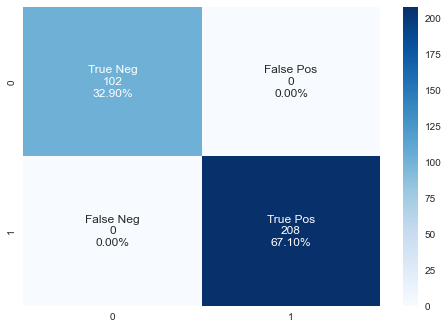

In [293]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model4.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model4.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model4.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model4.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

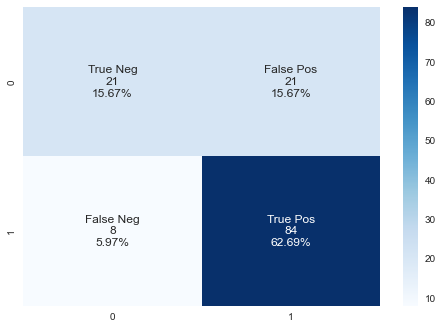

In [294]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model4.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model4.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model4.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model4.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Knn Model Train: ROC AUC=1.000
Knn Model test: ROC AUC=0.783


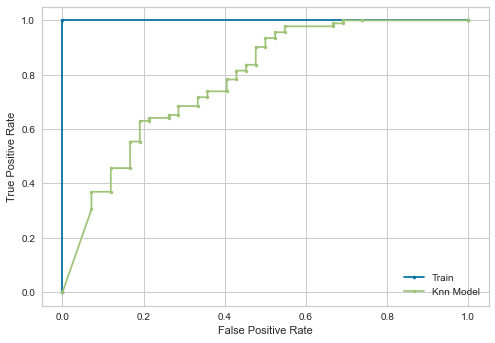

In [295]:
#train
Knn_probs =model4.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
Knn_probs = Knn_probs[:, 1]
# calculate scores
Knn_auc = roc_auc_score(y_train, Knn_probs)
# summarize scores
print('Knn Model Train: ROC AUC=%.3f' % (Knn_auc))

# calculate roc curves
Knn_fpr, Knn_tpr, _ = roc_curve(y_train, Knn_probs)
# plot the roc curve for the model
plt.plot(Knn_fpr, Knn_tpr, marker='.', label='Train')

#test
Knn_probs = model4.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
Knn_probs = Knn_probs[:, 1]
# calculate scores
Knn_auc = roc_auc_score(y_test, Knn_probs)
# summarize scores
print('Knn Model test: ROC AUC=%.3f' % (Knn_auc))

# calculate roc curves
Knn_fpr, Knn_tpr, _ = roc_curve(y_test, Knn_probs)
# plot the roc curve for the model
plt.plot(Knn_fpr, Knn_tpr, marker='.', label='Knn Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [296]:
Model_Knn_tuned=pd.DataFrame({'Training Data':[accuracy_score(y_train,model4.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model4.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model4.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model4.predict_proba(X_test_sc)[:,1])]},index=['KNN-Tuned'])
Model_Knn_tuned

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
KNN-Tuned,1.0,0.783582,1.0,0.783385


-------------------------------------------------------------------------------------------------------------------------------

# 1.6) Bagging and Boosting, Model Tuning.

### Bagging

In [297]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [298]:
model5= BaggingClassifier(random_state= 100)
model5.fit(X_train_sc,y_train)

BaggingClassifier(random_state=100)

In [299]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model5.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model5.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model5.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model5.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('Classification report Train set :')
print(classification_report(y_train,model5.predict(X_train_sc)))

print('\n')
print('Classification report Test set :')
print(classification_report(y_test,model5.predict(X_test_sc)))


Train Accuracy is : 0.9838709677419355

Test Accuracy is : 0.7910447761194029

Train ROC-AUC score is : 0.9990808823529411

Test ROC-AUC score is : 0.8263457556935818



Classification report Train set :
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.99      0.99      0.99       208

    accuracy                           0.98       310
   macro avg       0.98      0.98      0.98       310
weighted avg       0.98      0.98      0.98       310



Classification report Test set :
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        42
           1       0.87      0.82      0.84        92

    accuracy                           0.79       134
   macro avg       0.76      0.78      0.77       134
weighted avg       0.80      0.79      0.79       134



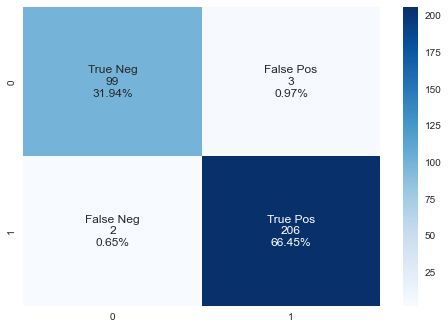

In [300]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model5.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model5.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model5.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model5.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

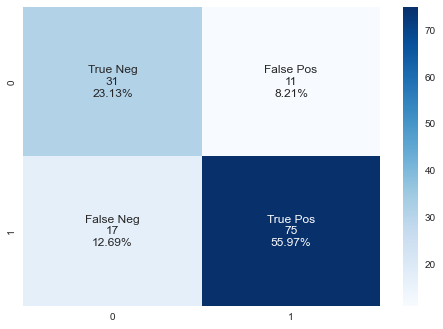

In [301]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model5.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model5.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model5.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model5.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Bagging Classifier Train: ROC AUC=0.999
Bagging classifier test: ROC AUC=0.826


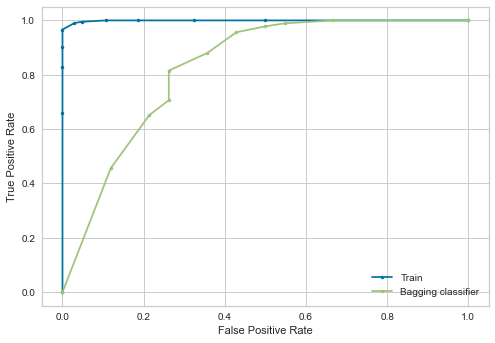

In [302]:
#train
model5_probs =model5.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
model5_probs = model5_probs[:, 1]
# calculate scores
model5_auc = roc_auc_score(y_train, model5_probs)
# summarize scores
print('Bagging Classifier Train: ROC AUC=%.3f' % (model5_auc))

# calculate roc curves
model5_fpr, model5_tpr, _ = roc_curve(y_train,model5_probs)
# plot the roc curve for the model
plt.plot(model5_fpr, model5_tpr, marker='.', label='Train')

#test
model5_probs = model5.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
model5_probs = model5_probs[:, 1]
# calculate scores
model5_auc = roc_auc_score(y_test, model5_probs)
# summarize scores
print('Bagging classifier test: ROC AUC=%.3f' % (model5_auc))

# calculate roc curves
model5_fpr, model5_tpr, _ = roc_curve(y_test, model5_probs)
# plot the roc curve for the model
plt.plot(model5_fpr, model5_tpr, marker='.', label='Bagging classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [303]:
Model_bagging=pd.DataFrame({'Training Data':[accuracy_score(y_train,model5.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model5.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model5.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model5.predict_proba(X_test_sc)[:,1])]},index=['Bagging Model'])
Model_bagging

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Bagging Model,0.983871,0.791045,0.999081,0.826346


Feature: 0, Score: 0.12427
Feature: 1, Score: 0.05653
Feature: 2, Score: 0.01599
Feature: 3, Score: 0.01563
Feature: 4, Score: 0.08450
Feature: 5, Score: 0.35845
Feature: 6, Score: 0.22109
Feature: 7, Score: 0.12354


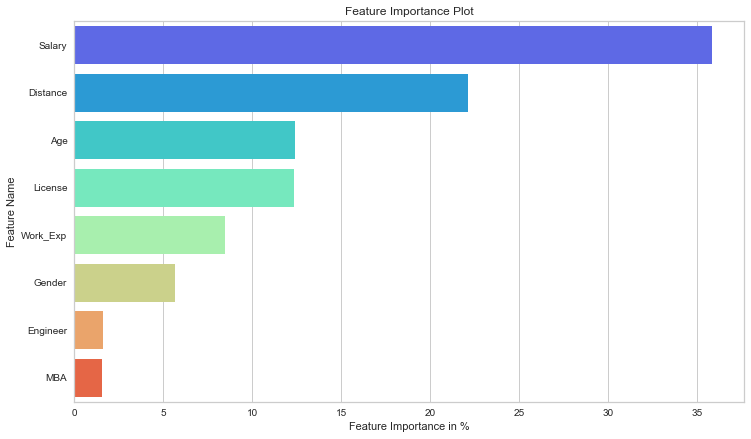

In [304]:
# # define the model
# model = BaggingClassifier()
# # fit the model
# model.fit(X_train_sc, y_train)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# define the model    
# model = BaggingClassifier(DecisionTreeClassifier())
# # fit the model
# model.fit(X_train_sc, y_train)
# get importance
feature_importances = np.mean([tree.feature_importances_ for tree in model5.estimators_], axis=0)
# summarize feature importance
for i,v in enumerate(feature_importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot the feature importance
x=pd.DataFrame(feature_importances*100, index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show();

### Hyperparameter tuning of Bagging Classifier -

In [305]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# # define models and parameters
# bag1 = BaggingClassifier()
# n_estimators = [10, 100, 1000]
# # define grid search
# grid = dict(n_estimators=n_estimators)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=bag1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train_sc, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [306]:
param_bag={'base_estimator':[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()],'max_samples':[0.5,0.6,0.7,0.8],'max_features':[0.3,0.4,0.5,0.6],
    'n_estimators' :[30,40,50,100],'random_state': [100]}

# param_bag={'base_estimator':[LogisticRegression(),DecisionTreeClassifier()],'max_samples':[0.5,0.6,0.7,0.8],'max_features':[0.3,0.4,0.5,0.6],
#     'n_estimators' :[13,15,17,19],'random_state': [100]}



In [307]:
model6=GridSearchCV(BaggingClassifier(),param_grid=param_bag,refit=True,verbose=True,n_jobs=-1)
model6.fit(X_train_sc,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(),
                                            DecisionTreeClassifier(),
                                            RandomForestClassifier()],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'max_samples': [0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [30, 40, 50, 100],
                         'random_state': [100]},
             verbose=True)

In [308]:
model6.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 100,
 'random_state': 100}

In [309]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model6.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model6.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model6.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model6.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('Bagging-Tuned Classification report Train set :')
print(classification_report(y_train,model6.predict(X_train_sc)))

print('\n')

print('Bagging-Tuned Classification report Test set :')
print(classification_report(y_test,model6.predict(X_test_sc)))

Train Accuracy is : 0.9419354838709677

Test Accuracy is : 0.7686567164179104

Train ROC-AUC score is : 0.9986331070889893

Test ROC-AUC score is : 0.8422619047619048



Bagging-Tuned Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       102
           1       0.92      1.00      0.96       208

    accuracy                           0.94       310
   macro avg       0.96      0.91      0.93       310
weighted avg       0.95      0.94      0.94       310



Bagging-Tuned Classification report Test set :
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        42
           1       0.80      0.89      0.84        92

    accuracy                           0.77       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.76      0.77      0.76       134



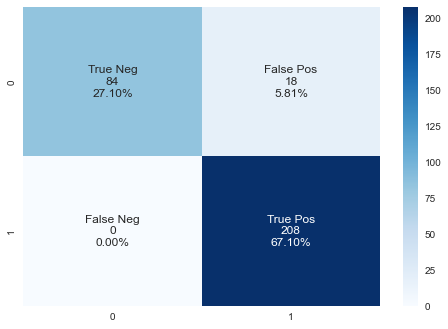

In [310]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model6.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model6.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model6.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model6.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

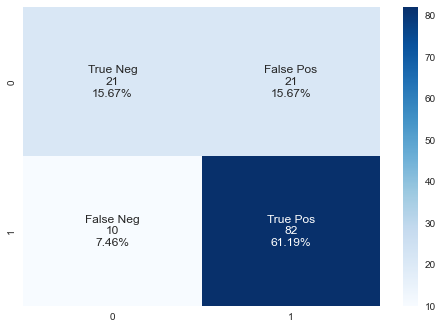

In [311]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model6.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model6.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model6.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model6.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Bagging Classifier-Tuned Train: ROC AUC=0.999
Bagging classifier-Tuned test: ROC AUC=0.842


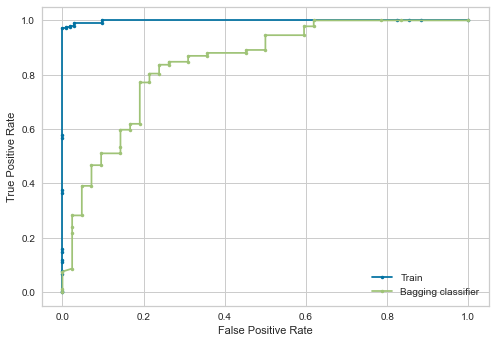

In [312]:
#train
bag_probs =model6.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
bag_probs = bag_probs[:, 1]
# calculate scores
bag_auc = roc_auc_score(y_train, bag_probs)
# summarize scores
print('Bagging Classifier-Tuned Train: ROC AUC=%.3f' % (bag_auc))

# calculate roc curves
bag_fpr, bag_tpr, _ = roc_curve(y_train, bag_probs)
# plot the roc curve for the model
plt.plot(bag_fpr, bag_tpr, marker='.', label='Train')

#test
bag_probs = model6.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
bag_probs = bag_probs[:, 1]
# calculate scores
bag_auc = roc_auc_score(y_test, bag_probs)
# summarize scores
print('Bagging classifier-Tuned test: ROC AUC=%.3f' % (bag_auc))

# calculate roc curves
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_probs)
# plot the roc curve for the model
plt.plot(bag_fpr, bag_tpr, marker='.', label='Bagging classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [313]:
Model_Bagging_tuned=pd.DataFrame({'Training Data':[accuracy_score(y_train,model6.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model6.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model6.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model6.predict_proba(X_test_sc)[:,1])]},index=['Bagging Model-Tuned'])
Model_Bagging_tuned

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Bagging Model-Tuned,0.941935,0.768657,0.998633,0.842262


### Boosting Classifier -

In [314]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [315]:
model7= AdaBoostClassifier(n_estimators=50, learning_rate=1)
model7.fit(X_train_sc,y_train)

AdaBoostClassifier(learning_rate=1)

In [316]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model7.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model7.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model7.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model7.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('AdaBoost Classification report Train set :')
print(classification_report(y_train,model7.predict(X_train_sc)))

print('\n')
print('AdaBoost Classification report Test set :')
print(classification_report(y_test,model7.predict(X_test_sc)))

Train Accuracy is : 0.8774193548387097

Test Accuracy is : 0.8059701492537313

Train ROC-AUC score is : 0.9403516214177979

Test ROC-AUC score is : 0.8090062111801243



AdaBoost Classification report Train set :
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.88      0.94      0.91       208

    accuracy                           0.88       310
   macro avg       0.87      0.84      0.86       310
weighted avg       0.88      0.88      0.87       310



AdaBoost Classification report Test set :
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        42
           1       0.85      0.87      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.80      0.81      0.80       134



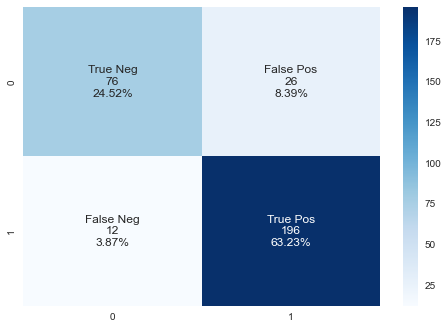

In [317]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model7.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model7.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model7.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model7.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

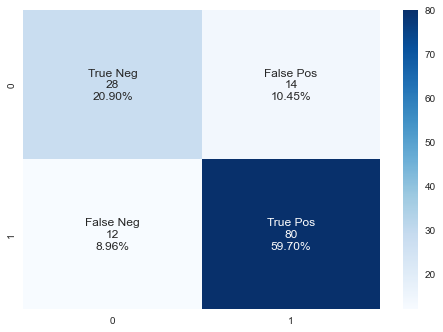

In [318]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model7.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model7.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model7.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model7.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

AdaBoost Classifier Train: ROC AUC=0.940
AdaBoost classifier test: ROC AUC=0.809


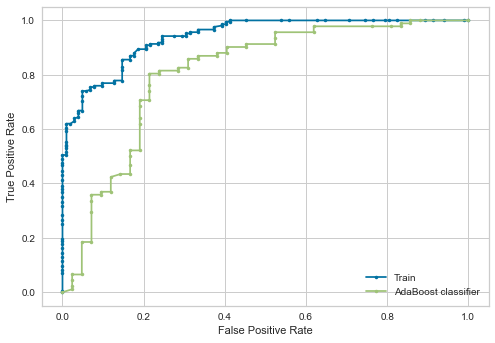

In [319]:
#train
model7_probs =model7.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
model7_probs = model7_probs[:, 1]
# calculate scores
model7_auc = roc_auc_score(y_train, model7_probs)
# summarize scores
print('AdaBoost Classifier Train: ROC AUC=%.3f' % (model7_auc))

# calculate roc curves
model7_fpr, model7_tpr, _ = roc_curve(y_train, model7_probs)
# plot the roc curve for the model
plt.plot(model7_fpr, model7_tpr, marker='.', label='Train')

#test
model7_probs = model7.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
model7_probs = model7_probs[:, 1]
# calculate scores
model7_auc = roc_auc_score(y_test, model7_probs)
# summarize scores
print('AdaBoost classifier test: ROC AUC=%.3f' % (model7_auc))

# calculate roc curves
model7_fpr, model7_tpr, _ = roc_curve(y_test, model7_probs)
# plot the roc curve for the model
plt.plot(model7_fpr, model7_tpr, marker='.', label='AdaBoost classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [320]:
Model_ADaBoost=pd.DataFrame({'Training Data':[accuracy_score(y_train,model7.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model7.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model7.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model7.predict_proba(X_test_sc)[:,1])]},index=['ADaBoost Model'])
Model_ADaBoost

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
ADaBoost Model,0.877419,0.80597,0.940352,0.809006


Feature: 0, Score: 0.20000
Feature: 1, Score: 0.04000
Feature: 2, Score: 0.02000
Feature: 3, Score: 0.04000
Feature: 4, Score: 0.06000
Feature: 5, Score: 0.30000
Feature: 6, Score: 0.28000
Feature: 7, Score: 0.06000


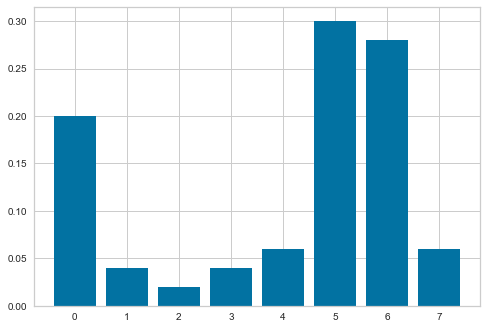

In [321]:
# get importance
importance = model7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

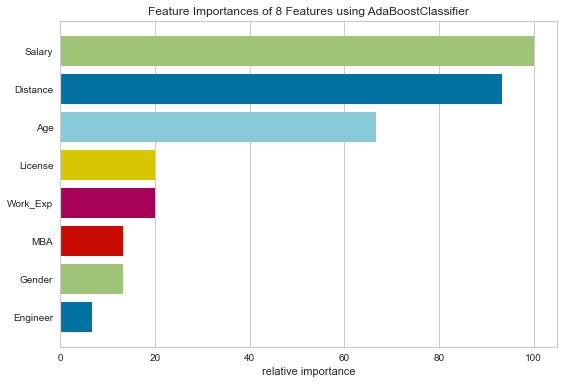

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 8 Features using AdaBoostClassifier'}, xlabel='relative importance'>,
                   estimator=AdaBoostClassifier(learning_rate=1))

In [322]:
# Feature importance
from yellowbrick.model_selection import feature_importances
feature_importances(model7, X_train_sc, y_train)

**Hyper Parameters AdaBoost**

In [323]:
model8= AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101),n_estimators=100, learning_rate=1)
model8.fit(X_train_sc,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=1, n_estimators=100, random_state=96)

In [324]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model8.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model8.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model8.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model8.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('AdaBoost Classification report Train set :')
print(classification_report(y_train,model8.predict(X_train_sc)))

print('\n')
print('AdaBoost Classification report Test set :')
print(classification_report(y_test,model8.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.8134328358208955

Train ROC-AUC score is : 0.9999999999999999

Test ROC-AUC score is : 0.8255693581780539



AdaBoost Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



AdaBoost Classification report Test set :
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        42
           1       0.85      0.89      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.77      0.78       134
weighted avg       0.81      0.81      0.81       134



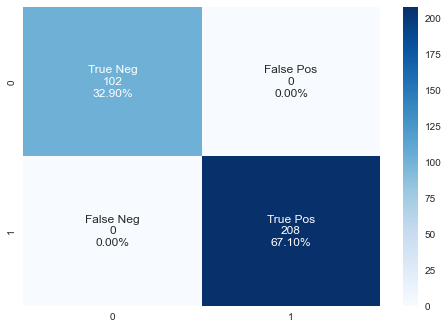

In [325]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model8.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model8.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model8.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model8.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

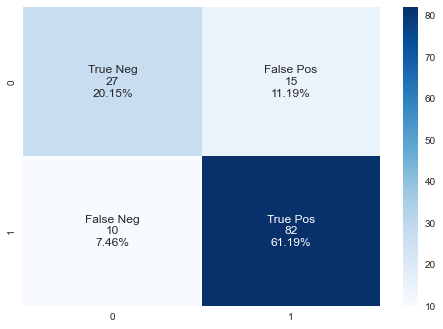

In [326]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model8.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model8.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model8.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model8.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

AdaBoost-Tuned Classifier Train: ROC AUC=1.000
AdaBoost-Tuned classifier test: ROC AUC=0.826


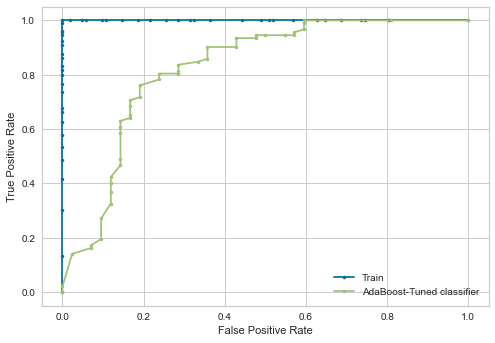

In [327]:
#train
ADB_probs =model8.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
ADB_probs = ADB_probs[:, 1]
# calculate scores
ADB_auc = roc_auc_score(y_train, ADB_probs)
# summarize scores
print('AdaBoost-Tuned Classifier Train: ROC AUC=%.3f' % (ADB_auc))

# calculate roc curves
ADB_fpr, ADB_tpr, _ = roc_curve(y_train, ADB_probs)
# plot the roc curve for the model
plt.plot(ADB_fpr, ADB_tpr, marker='.', label='Train')

#test
ADB_probs = model8.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
ADB_probs = ADB_probs[:, 1]
# calculate scores
ADB_auc = roc_auc_score(y_test, ADB_probs)
# summarize scores
print('AdaBoost-Tuned classifier test: ROC AUC=%.3f' % (ADB_auc))

# calculate roc curves
ADB_fpr, ADB_tpr, _ = roc_curve(y_test, ADB_probs)
# plot the roc curve for the model
plt.plot(ADB_fpr, ADB_tpr, marker='.', label='AdaBoost-Tuned classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [328]:
Model_ADaBoost_tuned=pd.DataFrame({'Training Data':[accuracy_score(y_train,model8.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model8.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model8.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model8.predict_proba(X_test_sc)[:,1])]},index=['ADaBoost-Tuned Model'])
Model_ADaBoost_tuned

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
ADaBoost-Tuned Model,1.0,0.813433,1.0,0.825569


### Gradient Boosting

In [329]:
model9= GradientBoostingClassifier(random_state = 100)
model9.fit(X_train_sc,y_train)

GradientBoostingClassifier(random_state=100)

In [330]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model9.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model9.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model9.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model9.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('Gradient Boosting Classification report Train set :')
print(classification_report(y_train,model9.predict(X_train_sc)))

print('Gradient Boosting Classification report Test set :')
print(classification_report(y_test,model9.predict(X_test_sc)))

Train Accuracy is : 0.967741935483871

Test Accuracy is : 0.7611940298507462

Train ROC-AUC score is : 0.9979732277526395

Test ROC-AUC score is : 0.8126293995859213



Gradient Boosting Classification report Train set :
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310

Gradient Boosting Classification report Test set :
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        42
           1       0.82      0.84      0.83        92

    accuracy                           0.76       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.76      0.76      0.76       134



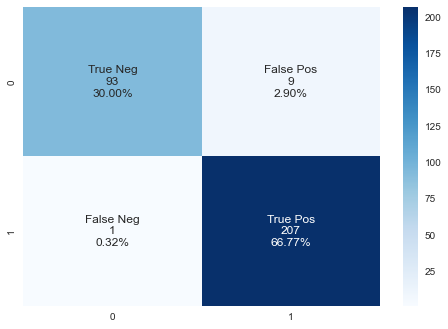

In [331]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model9.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model9.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model9.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model9.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

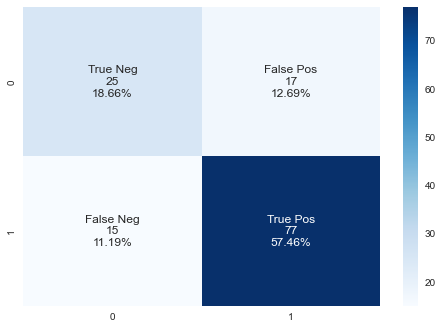

In [332]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model9.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model9.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model9.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model9.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Gradient Boosting Classifier Train: ROC AUC=0.998
Gradient Boosting classifier test: ROC AUC=0.813


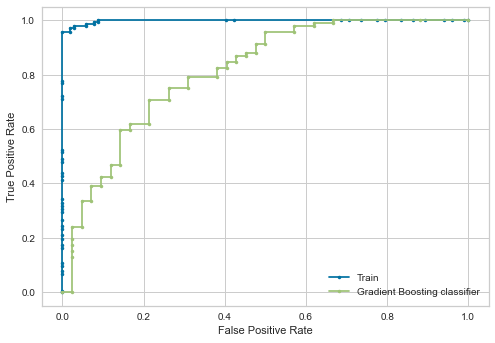

In [333]:
#train
model9_probs =model9.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
model9_probs = model9_probs[:, 1]
# calculate scores
model9_auc = roc_auc_score(y_train, model9_probs)
# summarize scores
print('Gradient Boosting Classifier Train: ROC AUC=%.3f' % (model9_auc))

# calculate roc curves
model9_fpr, model9_tpr, _ = roc_curve(y_train, model9_probs)
# plot the roc curve for the model
plt.plot(model9_fpr, model9_tpr, marker='.', label='Train')

#test
model9_probs = model9.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
model9_probs = model9_probs[:, 1]
# calculate scores
model9_auc = roc_auc_score(y_test, model9_probs)
# summarize scores
print('Gradient Boosting classifier test: ROC AUC=%.3f' % (model9_auc))

# calculate roc curves
model9_fpr, model9_tpr, _ = roc_curve(y_test, model9_probs)
# plot the roc curve for the model
plt.plot(model9_fpr, model9_tpr, marker='.', label='Gradient Boosting classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [334]:
Model_Gradient_Boosting=pd.DataFrame({'Training Data':[accuracy_score(y_train,model9.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model9.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model9.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model9.predict_proba(X_test_sc)[:,1])]},index=['Gradient Boosting Model'])
Model_Gradient_Boosting

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Gradient Boosting Model,0.967742,0.761194,0.997973,0.812629


Feature: 0, Score: 0.14419
Feature: 1, Score: 0.04799
Feature: 2, Score: 0.00477
Feature: 3, Score: 0.00669
Feature: 4, Score: 0.10523
Feature: 5, Score: 0.31975
Feature: 6, Score: 0.20720
Feature: 7, Score: 0.16418


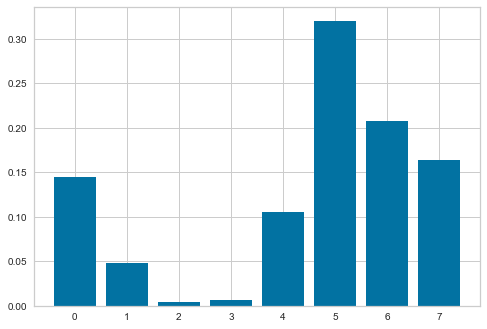

In [335]:
from matplotlib import pyplot
# get importance
importance = model9.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

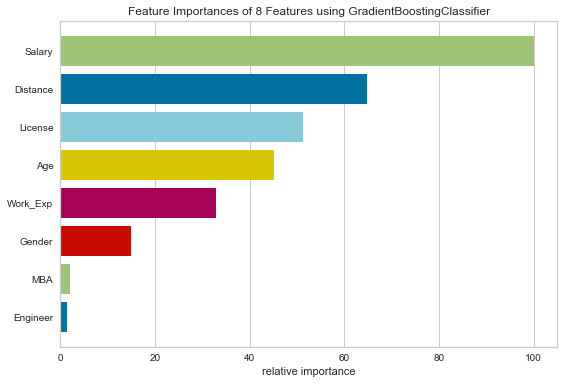

<AxesSubplot:title={'center':'Feature Importances of 8 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [336]:
from yellowbrick.model_selection import FeatureImportances
visualizer = FeatureImportances(model9)
visualizer.fit(X_train_sc, y_train)
visualizer.show()

#### Hyperparameter tuning of Boosting Classifier-

In [337]:
param_gbc={'learning_rate': [0.01,0.02,0.05,0.1], 'max_depth':[3,4,5,6,7,8],
           'min_samples_split': [9,10,11,12], 'n_estimators':[50,100],'random_state': [100]}  
# "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]}

In [338]:
model10=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,cv=3,refit=True,verbose=True,n_jobs=-1)
model10.fit(X_train_sc,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [50, 100], 'random_state': [100]},
             verbose=True)

In [339]:
model10.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 12,
 'n_estimators': 100,
 'random_state': 100}

In [340]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,model10.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,model10.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model10.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model10.predict_proba(X_test_sc)[:,1])))

print('\n\n')

print('Gradient Boosting Tuned Classification report Train set :')
print(classification_report(y_train,model10.predict(X_train_sc)))

print('Gradient Boosting Tuned Classification report Test set :')
print(classification_report(y_test,model10.predict(X_test_sc)))

Train Accuracy is : 0.9935483870967742

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.8530020703933747



Gradient Boosting Tuned Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.99      1.00      1.00       208

    accuracy                           0.99       310
   macro avg       1.00      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310

Gradient Boosting Tuned Classification report Test set :
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.83      0.86      0.84        92

    accuracy                           0.78       134
   macro avg       0.75      0.74      0.74       134
weighted avg       0.78      0.78      0.78       134



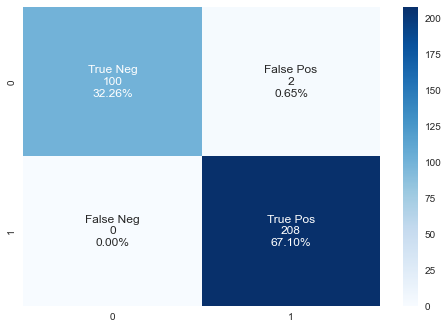

In [341]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_train,model10.predict(X_train_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_train,model10.predict(X_train_sc)).flatten()/np.sum(confusion_matrix(y_train,model10.predict(X_train_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,model10.predict(X_train_sc)),annot=labels, fmt="", cmap='Blues');

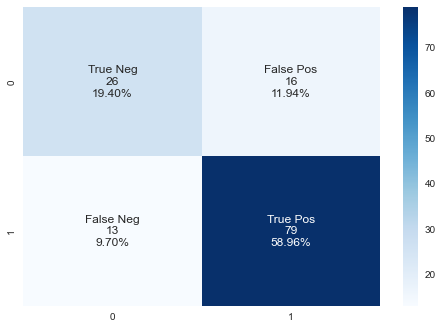

In [342]:
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in confusion_matrix(y_test,model10.predict(X_test_sc)).flatten()]
group_percentages=["{0:.2%}".format(value) for value in confusion_matrix(y_test,model10.predict(X_test_sc)).flatten()/np.sum(confusion_matrix(y_test,model10.predict(X_test_sc)).flatten())]
labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,model10.predict(X_test_sc)),annot=labels, fmt="", cmap='Blues');

Gradient Boosting Classifier-Tuned Train: ROC AUC=1.000
Gradient Boosting classifier-Tuned test: ROC AUC=0.853


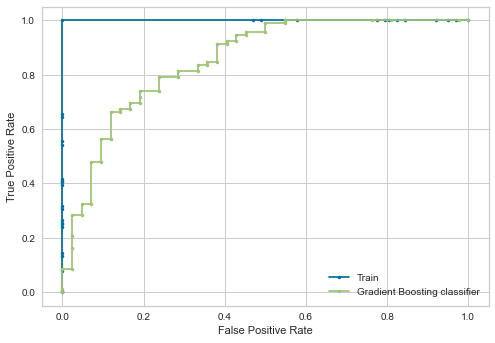

In [343]:
#train
gbc_probs =model10.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
gbc_probs = gbc_probs[:, 1]
# calculate scores
gbc_auc = roc_auc_score(y_train, gbc_probs)
# summarize scores
print('Gradient Boosting Classifier-Tuned Train: ROC AUC=%.3f' % (gbc_auc))

# calculate roc curves
gbc_fpr, gbc_tpr, _ = roc_curve(y_train, gbc_probs)
# plot the roc curve for the model
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='Train')

#test
gbc_probs = model10.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
gbc_probs = gbc_probs[:, 1]
# calculate scores
gbc_auc = roc_auc_score(y_test, gbc_probs)
# summarize scores
print('Gradient Boosting classifier-Tuned test: ROC AUC=%.3f' % (gbc_auc))

# calculate roc curves
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probs)
# plot the roc curve for the model
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [344]:
Model_Gradient_Boosting_tuned=pd.DataFrame({'Training Data':[accuracy_score(y_train,model10.predict(X_train_sc))],'Test Data':[accuracy_score(y_test,model10.predict(X_test_sc))],
                    'Train AUC-ROC Score':[roc_auc_score(y_train,model10.predict_proba(X_train_sc)[:,1])],'Test AUC-ROC Score':[roc_auc_score(y_test,model10.predict_proba(X_test_sc)[:,1])]},index=['Gradient Boosting Model-Tuned'])
Model_Gradient_Boosting_tuned

,Training Data,Test Data,Train AUC-ROC Score,Test AUC-ROC Score
Gradient Boosting Model-Tuned,0.993548,0.783582,1.0,0.853002


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

## Confusion Matrix of Train Set of All the Models

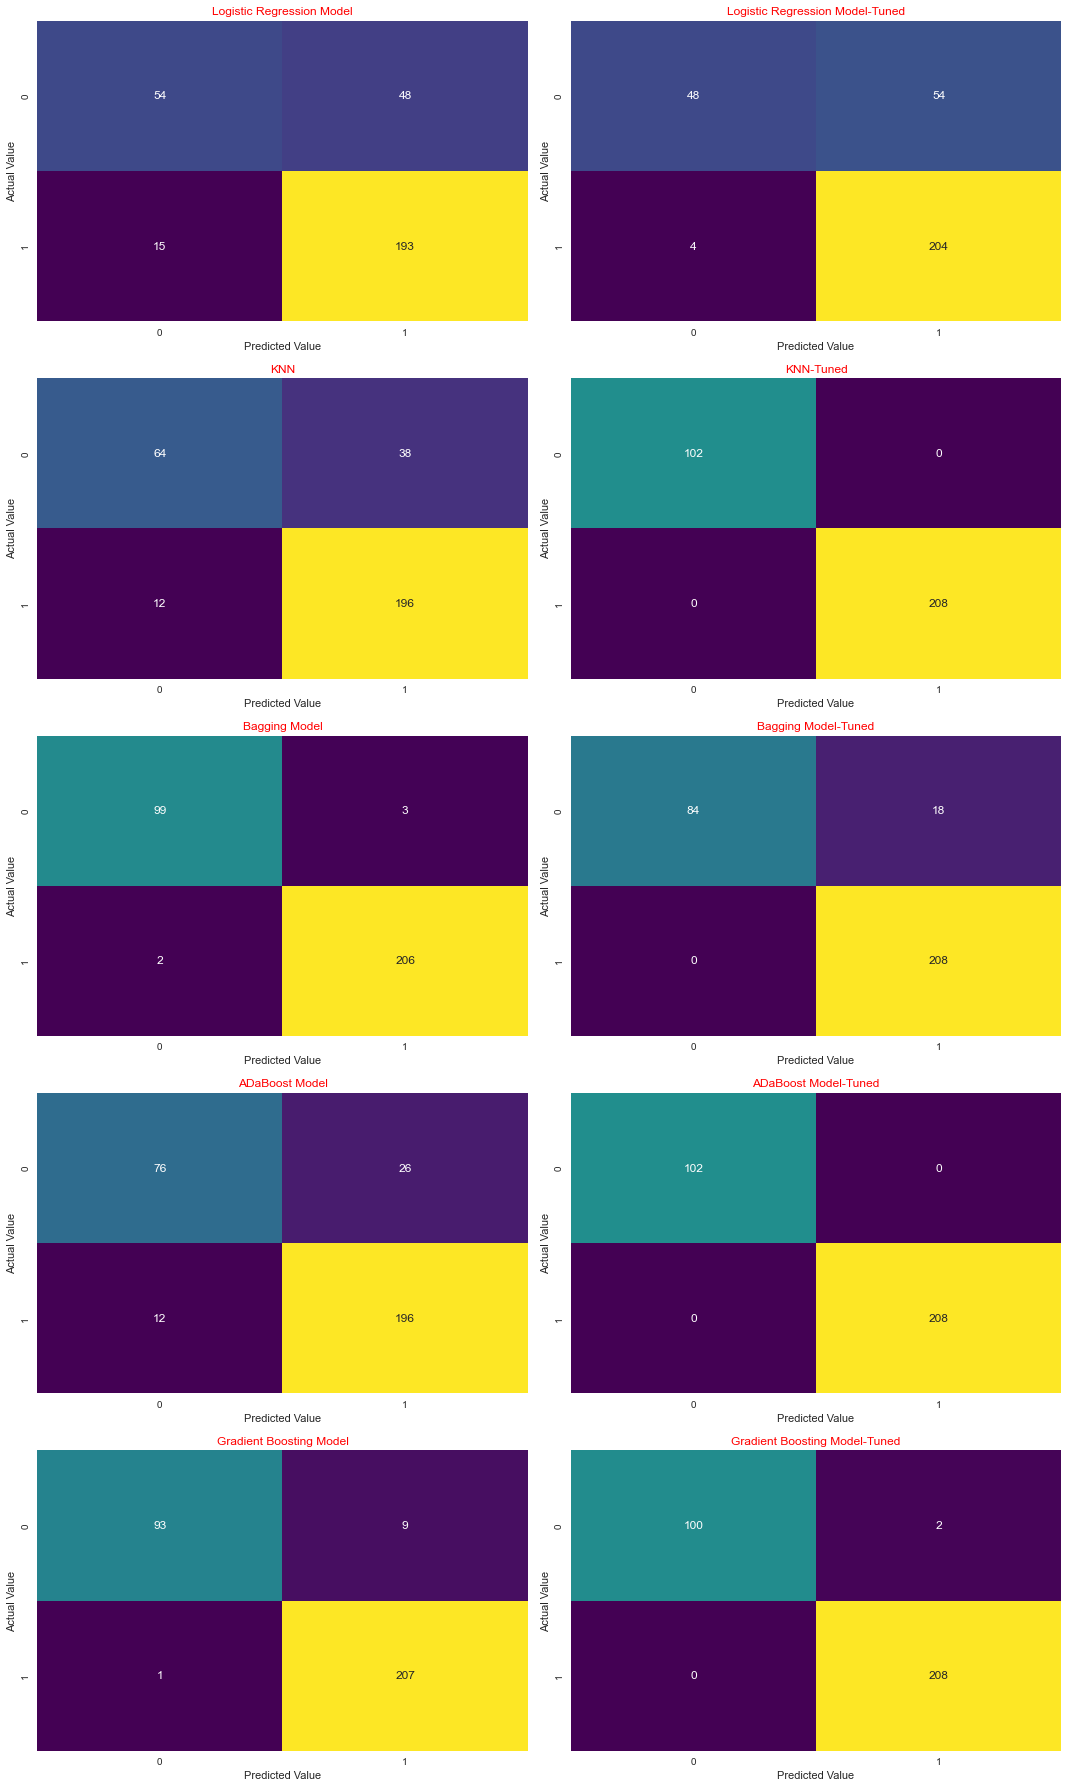

In [347]:
fig=plt.figure(figsize=(15,25))
for i in range(0, len(models)):
    ax=fig.add_subplot(5,2,i+1)
    sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train_sc)), annot=True, fmt='.0f', cbar=False,cmap="viridis" )
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
    #plt.title('Confusion Matrix for Predictions on Train Set')
plt.tight_layout()

## Confusion Matrix of Test Set of All the Models

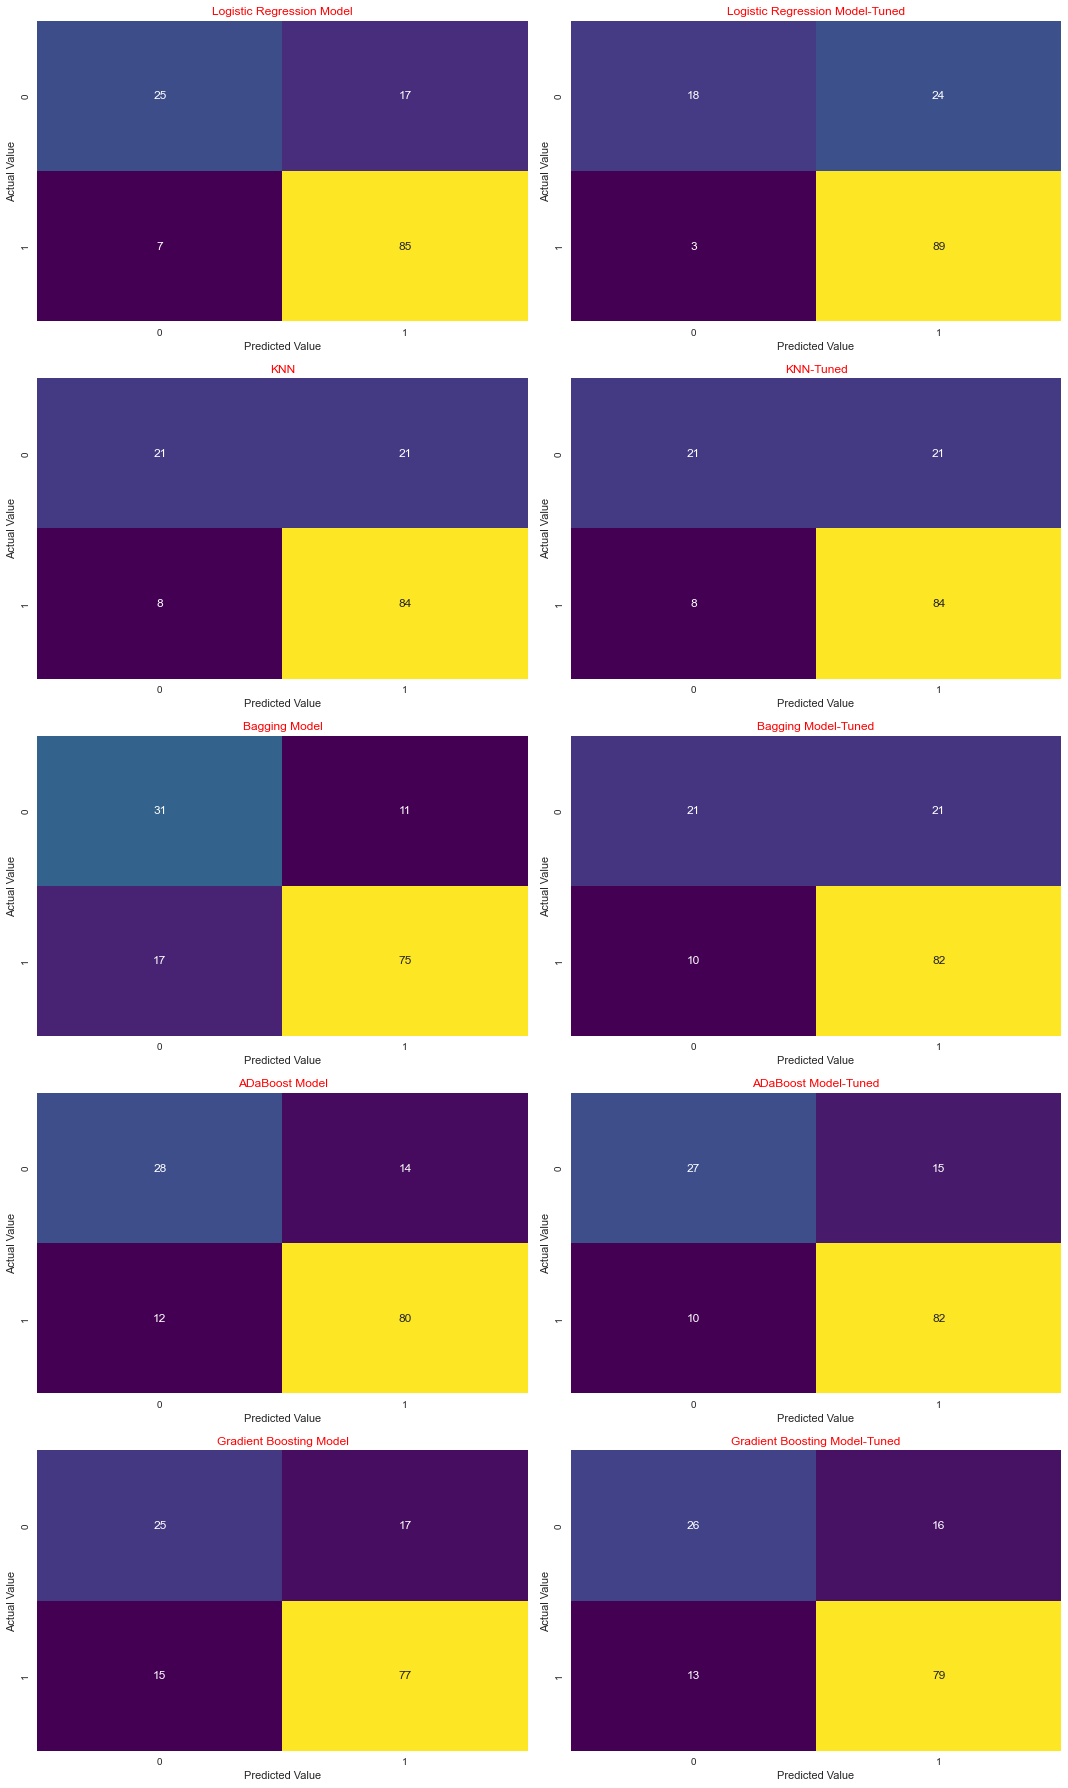

In [348]:
fig=plt.figure(figsize=(15,25))
for i in range(0, len(models)):
    ax=fig.add_subplot(5,2,i+1)
    sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test_sc)), annot=True, fmt='.0f', cbar=False, cmap="viridis")
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
    #plt.title('Confusion Matrix for Predictions on Test Set')
plt.tight_layout()

## ROC curve and AUC score of All the Models

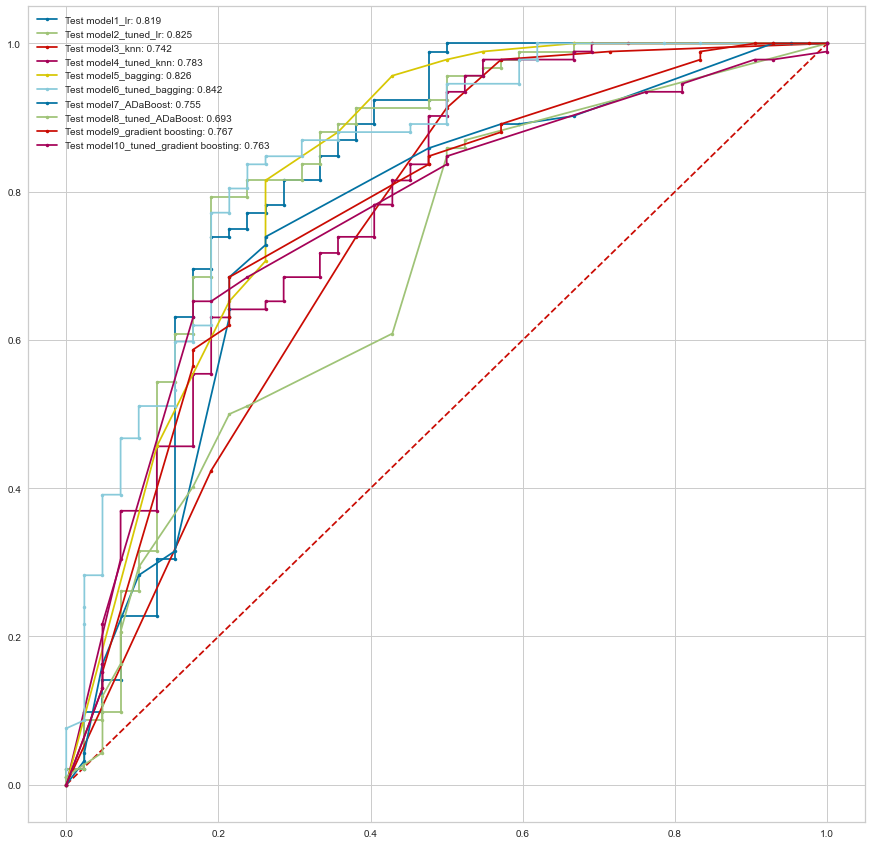

In [349]:
plt.figure(figsize=(15,15))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,model1.predict_proba(X_test_sc)[:,1]) # Model lr
auc =roc_auc_score(y_test,model1.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_lr, tpr_lr, marker='.', label = 'Test model1_lr: %.3f'% auc)

fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y_test,model2.predict_proba(X_test_sc)[:,1]) # Model lr
auc =roc_auc_score(y_test,model2.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_lr1, tpr_lr1, marker='.', label = 'Test model2_tuned_lr: %.3f'% auc)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,model3.predict_proba(X_test_sc)[:,1]) # Model knn
auc = roc_auc_score(y_test,model3.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_knn, tpr_knn, marker='.', label = 'Test model3_knn: %.3f'% auc)

fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test,model4.predict_proba(X_test_sc)[:,1]) # Model grid knn
auc = roc_auc_score(y_test,model4.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_knn1, tpr_knn1, marker='.', label = 'Test model4_tuned_knn: %.3f'% auc)

fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test,model5.predict_proba(X_test_sc)[:,1]) # Model bag
auc =roc_auc_score(y_test,model5.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_bag, tpr_bag, marker='.', label = 'Test model5_bagging: %.3f'% auc)

fpr_bag1, tpr_bag1, thresholds_bag1 = roc_curve(y_test,model6.predict_proba(X_test_sc)[:,1]) # Model grid bag
auc =roc_auc_score(y_test,model6.predict_proba(X_test_sc)[:,1]) # getting AUC for the model
plt.plot(fpr_bag1, tpr_bag1, marker='.', label = 'Test model6_tuned_bagging: %.3f'% auc)

fpr_ADB, tpr_ADB, thresholds_ADB = roc_curve(y_test,model7.predict_proba(X_test)[:,1]) # Model adb
auc =roc_auc_score(y_test,model7.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr_ADB, tpr_ADB, marker='.', label = 'Test model7_ADaBoost: %.3f'% auc)

fpr_ADB1, tpr_ADB1, thresholds_ADB1 = roc_curve(y_test,model8.predict_proba(X_test)[:,1]) # Model grid adb
auc =roc_auc_score(y_test,model8.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr_ADB1, tpr_ADB1, marker='.', label = 'Test model8_tuned_ADaBoost: %.3f'% auc)

fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test,model9.predict_proba(X_test)[:,1]) # Model gb
auc =roc_auc_score(y_test,model9.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr_gbc, tpr_gbc, marker='.', label = 'Test model9_gradient boosting: %.3f'% auc)

fpr_gbc1, tpr_gbc1, thresholds_gbc1 = roc_curve(y_test,model10.predict_proba(X_test)[:,1]) # Model grid_gb
auc =roc_auc_score(y_test,model10.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr_gbc1, tpr_gbc1, marker='.', label = 'Test model10_tuned_gradient boosting: %.3f'% auc)


# show the legend
plt.legend()
# show the plot
plt.show()

### Tabular comparison of Train and Test set with default parameters of All the Models

In [350]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

index=['Accuracy','Recall','Precision','F1 score','ROC_AUC score']


data = pd.DataFrame({'Logistic Regression-Train':[accuracy_score(y_train, model1.predict(X_train_sc)),
                                                recall_score(y_train, model1.predict(X_train_sc)),
                                                precision_score(y_train, model1.predict(X_train_sc)),
                                                f1_score(y_train, model1.predict(X_train_sc)),
                                                roc_auc_score(y_train, model1.predict_proba(X_train_sc)[:,1]).round(2)],
        'Logistic Regression-Test':[accuracy_score(y_test, model1.predict(X_test_sc)),
                                    recall_score(y_test, model1.predict(X_test_sc)),
                                    precision_score(y_test, model1.predict(X_test_sc)), 
                                    f1_score(y_test, model1.predict(X_test_sc)),
                                    roc_auc_score(y_test, model1.predict_proba(X_test_sc)[:,1]).round(2)],
                     'KNN-Train':[accuracy_score(y_train, model3.predict(X_train_sc)),
                                recall_score(y_train, model3.predict(X_train_sc)),
                                precision_score(y_train, model3.predict(X_train_sc)),
                                f1_score(y_train, model3.predict(X_train_sc)),
                                roc_auc_score(y_train, model3.predict_proba(X_train_sc)[:,1]).round(2)],
                     'KNN-Test':[accuracy_score(y_test, model3.predict(X_test_sc)),
                                recall_score(y_test, model3.predict(X_test_sc)),
                                precision_score(y_test, model3.predict(X_test_sc)),
                                f1_score(y_test,model3.predict(X_test_sc)),
                                roc_auc_score(y_test, model3.predict_proba(X_test_sc)[:,1]).round(2)],                          
            'Bagging-Train':[accuracy_score(y_train, model5.predict(X_train_sc)),
                                recall_score(y_train, model5.predict(X_train_sc)),
                                precision_score(y_train, model5.predict(X_train_sc)),
                                f1_score(y_train, model5.predict(X_train_sc)),
                                roc_auc_score(y_train, model5.predict_proba(X_train_sc)[:,1]).round(2)],
             'Bagging-Test':[accuracy_score(y_test, model5.predict(X_test_sc)),
                                recall_score(y_test, model5.predict(X_test_sc)),
                                precision_score(y_test, model5.predict(X_test_sc)),
                                f1_score(y_test,model5.predict(X_test_sc)),
                                roc_auc_score(y_test, model5.predict_proba(X_test_sc)[:,1]).round(2)],           
            'ADaBoost-Train':[accuracy_score(y_train, model7.predict(X_train_sc)),
                                recall_score(y_train, model7.predict(X_train_sc)),
                                precision_score(y_train, model7.predict(X_train_sc)),
                                f1_score(y_train, model7.predict(X_train_sc)),
                                roc_auc_score(y_train, model7.predict_proba(X_train_sc)[:,1]).round(2)],
            'ADaBoost-Test':[accuracy_score(y_test, model7.predict(X_test_sc)),
                                recall_score(y_test, model7.predict(X_test_sc)),
                                precision_score(y_test, model7.predict(X_test_sc)),
                                f1_score(y_test,model7.predict(X_test_sc)),
                                roc_auc_score(y_test, model7.predict_proba(X_test_sc)[:,1]).round(2)],     
            'Gradient Boosting-Train':[accuracy_score(y_train, model9.predict(X_train_sc)),
                                recall_score(y_train, model9.predict(X_train_sc)),
                                precision_score(y_train, model9.predict(X_train_sc)),
                                f1_score(y_train, model9.predict(X_train_sc)),
                                roc_auc_score(y_train, model9.predict_proba(X_train_sc)[:,1]).round(2)], 
            'Gradient Boosting-Test':[accuracy_score(y_test, model9.predict(X_test_sc)),
                                recall_score(y_test, model9.predict(X_test_sc)),
                                precision_score(y_test, model9.predict(X_test_sc)),
                                f1_score(y_test,model9.predict(X_test_sc)),
                                roc_auc_score(y_test, model9.predict_proba(X_test_sc)[:,1]).round(2)]
           
    },index=index)                    
data

,Logistic Regression-Train,Logistic Regression-Test,KNN-Train,KNN-Test,Bagging-Train,Bagging-Test,ADaBoost-Train,ADaBoost-Test,Gradient Boosting-Train,Gradient Boosting-Test
Accuracy,0.796774,0.820896,0.838710,0.783582,0.983871,0.791045,0.877419,0.805970,0.967742,0.761194
Recall,0.927885,0.923913,0.942308,0.913043,0.990385,0.815217,0.942308,0.869565,0.995192,0.836957
Precision,0.800830,0.833333,0.837607,0.800000,0.985646,0.872093,0.882883,0.851064,0.958333,0.819149
F1 score,0.859688,0.876289,0.886878,0.852792,0.988010,0.842697,0.911628,0.860215,0.976415,0.827957
ROC_AUC score,0.830000,0.820000,0.920000,0.740000,1.000000,0.830000,0.940000,0.810000,1.000000,0.810000


### Tabular comparison of Train and Test set with Hyperparameters of All the Models

In [351]:
index=['Accuracy','Recall','Precision','F1 score','ROC_AUC score']
data = pd.DataFrame({ 'Logistic Regression Tuned-Train':[accuracy_score(y_train, model2.predict(X_train_sc)),
                                           recall_score(y_train, model2.predict(X_train_sc)),
                                        precision_score(y_train, model2.predict(X_train_sc)),
                                        f1_score(y_train, model2.predict(X_train_sc)),
                    roc_auc_score(y_train, model2.predict_proba(X_train_sc)[:,1]).round(2)], 
        'Logistic Regression Tuned-Test':[accuracy_score(y_test, model2.predict(X_test_sc)),
                                           recall_score(y_test, model2.predict(X_test_sc)),
                                           precision_score(y_test, model2.predict(X_test_sc)),
                                           f1_score(y_test,model2.predict(X_test_sc)),
                                           roc_auc_score(y_test, model2.predict_proba(X_test_sc)[:,1]).round(2)],
           'KNN Tuned-Train':[accuracy_score(y_train, model4.predict(X_train_sc)),
                                recall_score(y_train, model4.predict(X_train_sc)),
                                precision_score(y_train, model4.predict(X_train_sc)),
                                f1_score(y_train, model4.predict(X_train_sc)),
                                roc_auc_score(y_train, model4.predict_proba(X_train_sc)[:,1]).round(2)],
             'KNN Tuned-Test':[accuracy_score(y_test, model4.predict(X_test_sc)),
                                recall_score(y_test, model4.predict(X_test_sc)),
                                precision_score(y_test, model4.predict(X_test_sc)),
                                f1_score(y_test,model4.predict(X_test_sc)),
                                roc_auc_score(y_test, model4.predict_proba(X_test_sc)[:,1]).round(2)], 
             'Bagging Tuned-Train':[accuracy_score(y_train, model6.predict(X_train_sc)),
                                recall_score(y_train, model6.predict(X_train_sc)),
                                precision_score(y_train, model6.predict(X_train_sc)),
                                f1_score(y_train, model6.predict(X_train_sc)),
                                roc_auc_score(y_train, model6.predict_proba(X_train_sc)[:,1]).round(2)],
             'Bagging Tuned-Test': [accuracy_score(y_test, model6.predict(X_test_sc)),
                                recall_score(y_test, model6.predict(X_test_sc)),
                                precision_score(y_test, model6.predict(X_test_sc)),
                                f1_score(y_test,model6.predict(X_test_sc)),
                                roc_auc_score(y_test, model6.predict_proba(X_test_sc)[:,1]).round(2)],
             'ADaBoost Tuned-Train':[accuracy_score(y_train, model8.predict(X_train_sc)),
                                recall_score(y_train, model8.predict(X_train_sc)),
                                precision_score(y_train, model8.predict(X_train_sc)),
                                f1_score(y_train, model8.predict(X_train_sc)),
                                roc_auc_score(y_train, model8.predict_proba(X_train_sc)[:,1]).round(2)],
            'ADaBoost Tuned-Test':[accuracy_score(y_test, model8.predict(X_test_sc)),
                                recall_score(y_test, model8.predict(X_test_sc)),
                                precision_score(y_test, model8.predict(X_test_sc)),
                                f1_score(y_test,model8.predict(X_test_sc)),
                                roc_auc_score(y_test, model8.predict_proba(X_test_sc)[:,1]).round(2)],
             'Gradient Boosting Tuned-Train':[accuracy_score(y_train, model10.predict(X_train_sc)),
                                recall_score(y_train, model10.predict(X_train_sc)),
                                precision_score(y_train, model10.predict(X_train_sc)),
                                f1_score(y_train, model10.predict(X_train_sc)),
                                roc_auc_score(y_train, model10.predict_proba(X_train_sc)[:,1]).round(2)],
            'Gradient Boosting Tuned-Test':[accuracy_score(y_test, model10.predict(X_test_sc)),
                                recall_score(y_test, model10.predict(X_test_sc)),
                                precision_score(y_test, model10.predict(X_test_sc)),
                                f1_score(y_test,model10.predict(X_test_sc)),
                                roc_auc_score(y_test, model10.predict_proba(X_test_sc)[:,1]).round(2)]},index=index)
data

,Logistic Regression Tuned-Train,Logistic Regression Tuned-Test,KNN Tuned-Train,KNN Tuned-Test,Bagging Tuned-Train,Bagging Tuned-Test,ADaBoost Tuned-Train,ADaBoost Tuned-Test,Gradient Boosting Tuned-Train,Gradient Boosting Tuned-Test
Accuracy,0.812903,0.798507,1.0,0.783582,0.941935,0.768657,1.0,0.813433,0.993548,0.783582
Recall,0.980769,0.967391,1.0,0.913043,1.000000,0.891304,1.0,0.891304,1.000000,0.858696
Precision,0.790698,0.787611,1.0,0.800000,0.920354,0.796117,1.0,0.845361,0.990476,0.831579
F1 score,0.875536,0.868293,1.0,0.852792,0.958525,0.841026,1.0,0.867725,0.995215,0.844920
ROC_AUC score,0.800000,0.830000,1.0,0.780000,1.000000,0.840000,1.0,0.830000,1.000000,0.850000


----------------------------------------------** THANK YOU**-------------------------------------------------------------------

In [ ]:
# models=[model1,model2, model3, model4, model5, model6, model7, model8, model9, model10]
# models_names={model1:'Logistic Regression Model',model2:'Logistic Regression Model-Tuned', 
#               model3:'KNN', model4:'KNN-Tuned', model5:'Bagging Model', model6:'Bagging Model-Tuned', 
#               model7:'ADaBoost Model', model8:'ADaBoost Model-Tuned', model9:'Gradient Boosting Model', 
#               model10:'Gradient Boosting Model-Tuned'}

In [ ]:
# prob1=model[i].predict_proba(X_train_sc)
# for j in np.arange(0.1,1,0.1):
#     custom_prob=j
#     custom_cutoff_data=[]
#     for i in range(0, len(y_train)):
#         if np.array(prob1[:,1])[i]>custom_prob:
#             a=1
#         else:
#             a=0
#         custom_cutoff_data.append(a)
#     print(round(j,3),'\n')
#     print('Accuracy Score', round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
#     print('F1 Score', round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
#     plt.figure(figsize=(6,4))
#     print('Confusion Matrix')
#     sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
#     plt.show();

In [352]:
# fig=plt.figure(figsize=(15,25))
# for i in range(0, len(models)):
#     ax=fig.add_subplot(5,2,i+1)
#     fpr, tpr, thresholds = roc_curve(y_test,model[i].predict_proba(X_test_sc)[:,1]) # Model lr
#     auc =roc_auc_score(y_test,model[i].predict_proba(X_test_sc)[:,1]) # getting AUC for the model
#     plt.plot(fpr, tpr, marker='.', label = 'Test model1_lr: %.3f'% auc) 

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.0])
#     plt.rcParams['font.size'] = 12
#     plt.title('ROC curve for diabetes classifier')
#     plt.xlabel('False Positive Rate (1 - Specificity)')
#     plt.ylabel('True Positive Rate (Sensitivity)')
#     plt.grid(True)
#     ax.set_title(models_names[models[i]],color='Red')
# #     plt.ylabel('Actual Value')
# #     plt.xlabel('Predicted Value')
#     #plt.title('Confusion Matrix for Predictions on Test Set')
# plt.tight_layout()


In [353]:
# import collections

# classifiers = {
#     "Logistic Regression": LogisticRegression(),"KNearest": KNeighborsClassifier(),"Bagging": BaggingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),"Gradient Boosting":GradientBoostingClassifier()}

In [354]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

# for i, (key, classifier) in enumerate(classifiers.items()):
#     y_pred = classifier.fit(X_train_sc, y_train).predict(X_train_sc)
#     cf_matrix = confusion_matrix(y_train, y_pred)
#     disp = ConfusionMatrixDisplay(cf_matrix)
#     disp.plot(ax=axes[i], xticks_rotation=45)
#     disp.ax_.set_title(key)
#     disp.im_.colorbar.remove()
#     disp.ax_.set_xlabel('')
#     if i!=0:
#         disp.ax_.set_ylabel('')
#         f.text(0.4, 0.1, 'Predicted label', ha='left')
# plt.subplots_adjust(wspace=0.40, hspace=0.1)


# f.colorbar(disp.im_, ax=axes)
# plt.show()

In [355]:
# for key, classifier in classifiers.items(): 
#     y_pred = classifier.fit(X_train_sc, y_train).predict(X_test_sc)
#     cf_matrix_test=confusion_matrix(y_test, y_pred)
#     print(cf_matrix_test)

In [356]:
# from sklearn.metrics import confusion_matrix
# cf_matrix = dict.fromkeys(classifiers.keys())
# for key, classifier in classifiers.items(): 
#     y_pred = classifier.fit(X_train_sc, y_train.values.ravel()).predict(X_test_sc)
#     cf_matrix[key]=confusion_matrix(y_test, y_pred)

In [357]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
# import collections
# classifiers = {
#     "Logistic Regression": LogisticRegression(),"KNearest": KNeighborsClassifier(),"Bagging": BaggingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),"Gradient Boosting":GradientBoostingClassifier()}

In [358]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

# for i, (key, classifier) in enumerate(classifiers.items()):
#     y_pred = classifier.fit(X_train_sc, y_train).predict(X_test_sc)
#     cf_matrix = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(cf_matrix)
#     disp.plot(ax=axes[i], xticks_rotation=45)
#     disp.ax_.set_title(key)
#     disp.im_.colorbar.remove()
#     disp.ax_.set_xlabel('')
#     if i!=0:
#         disp.ax_.set_ylabel('')
#         f.text(0.4, 0.1, 'Predicted label', ha='left')
# plt.subplots_adjust(wspace=0.40, hspace=0.1)


# f.colorbar(disp.im_, ax=axes)
# plt.show()